In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

In [17]:
s = 'insert into points_sz values ({id}, \'point({longitude} {latitude})\');'
idpoi = 1
with open(r"E:\DBGroup\sz_points.csv", "a", newline ='') as csvfile:
    writer = csv.writer(csvfile)
    with open(r"E:\DBGroup\sz_points_insert.sql", "a") as sqlfile:
        with open(r"E:\DBGroup\sz_score.txt", "r") as f:
            for raw in f.readlines():
                line = raw.strip('\n')
                line = line[line.find(';') + 1:]
                points = line.split(',')
                for i in range(0, int(len(points) / 2)):
                    pos = i * 2
                    if float(points[pos]) < float(points[pos + 1]):
                        print('error!')
                        print(raw)
                        print(points[pos])
                        print(points[pos + 1])
                        sys.exit()
                    writer.writerow(points[pos:pos + 2])
                    sqlfile.write(s.format(id = idpoi, longitude = points[pos], latitude = points[pos + 1]) + '\n')
                    idpoi = idpoi + 1
print('complete!')

ValueError: could not convert string to float: 

In [14]:
line = '13;114.167786,22.563984,114.16755,22.564016,114.16755,22.563984,114.16752,22.56405,114.16758,22.56405,114.16769,22.564034,114.16795,22.563984,114.1683,22.563883,114.16827,22.563868,114.16785,22.563967,114.166916,22.5642,114.165886,22.564283,114.1654,22.5643,114.16468,22.564333'
line = line[line.find(';') + 1:]
points = line.split(',')
print(points)

['114.167786', '22.563984', '114.16755', '22.564016', '114.16755', '22.563984', '114.16752', '22.56405', '114.16758', '22.56405', '114.16769', '22.564034', '114.16795', '22.563984', '114.1683', '22.563883', '114.16827', '22.563868', '114.16785', '22.563967', '114.166916', '22.5642', '114.165886', '22.564283', '114.1654', '22.5643', '114.16468', '22.564333']


In [15]:
time = []
with open(r"E:\DBGroup\data\qry_sz.log", "r") as f:
    i = 1
    temp = []
    for line in f.readlines():
        line = float(line.strip('\n'))
        temp.append(line)
        i = i + 1
        if i == 22:
            i = 1
            time.append(temp)
            temp = []
time

[[12.574,
  54.87,
  105.959,
  155.2,
  220.889,
  271.242,
  309.3,
  357.188,
  425.493,
  481.013,
  533.31,
  582.899,
  638.092,
  699.468,
  762.058,
  820.896,
  824.86,
  968.0,
  942.61,
  1020.945,
  1059.454],
 [32.211,
  155.962,
  301.477,
  452.322,
  597.649,
  746.272,
  910.204,
  1063.0,
  1222.028,
  1359.144,
  1504.795,
  1648.803,
  1788.838,
  1972.346,
  2116.468,
  2240.206,
  2411.347,
  2561.771,
  2716.832,
  2859.348,
  3029.727],
 [2203.547,
  10816.463,
  21454.104,
  32398.322,
  43262.602,
  53820.763,
  64483.315,
  75289.593,
  86179.252,
  97150.717,
  107505.942,
  118222.616,
  128481.506,
  139481.606,
  150264.509,
  160721.954,
  171701.624,
  183076.548,
  193461.056,
  204224.257,
  215194.073]]

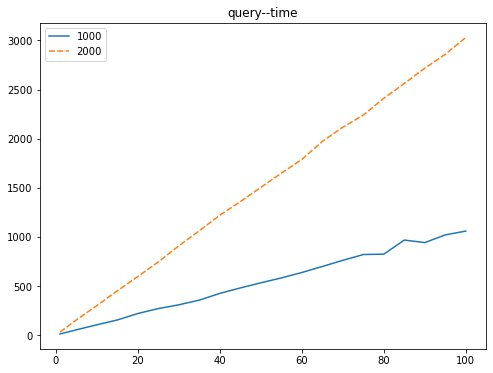

In [33]:
index = [1]
temp = [x for x in range(5, 105, 5)]
index += temp
data = pd.DataFrame(time).T
data.columns = ['1000','2000','3000']
data.index = index
plt.figure(figsize=(8, 6))
plt.title('query--time')
sns.lineplot(data=data[['1000', '2000']])
plt.show()

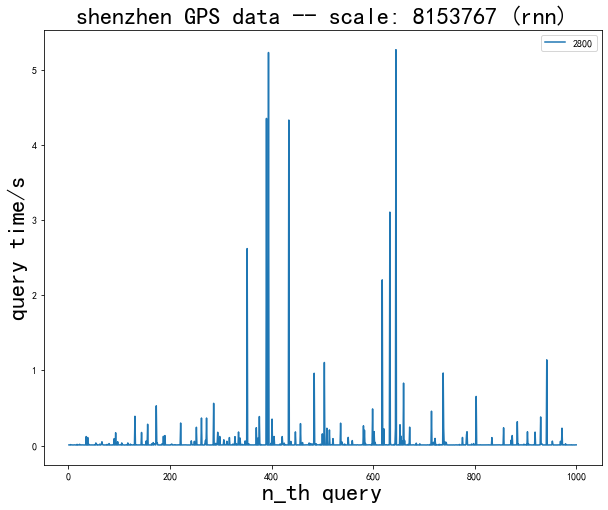

In [50]:
string = "8.827 7.953 7.808 12.649 8.498 9.514 8.297 8.113 7.809 8.020 9.037 9.473 7.948 7.792 8.657 8.169 15.776 7.939 9.686 8.139 9.556 16.963 9.356 8.425 7.560 9.394 8.864 8.634 8.201 8.360 7.801 8.320 10.155 8.323 120.057 8.182 7.305 107.510 8.373 18.095 9.263 7.996 8.386 8.060 8.435 7.814 8.154 8.329 7.932 9.755 8.136 11.005 7.062 34.710 11.303 8.489 13.673 7.822 8.282 7.517 9.854 20.355 7.525 8.125 15.185 50.788 15.417 8.746 7.927 8.702 7.591 8.891 8.694 8.282 7.739 14.867 9.016 8.414 8.520 26.657 8.091 8.443 9.852 9.040 8.043 7.304 8.939 8.162 8.798 91.254 8.824 8.364 170.605 9.871 7.816 8.204 50.938 9.425 9.499 10.097 8.712 8.407 9.143 8.088 35.272 8.135 9.452 9.516 7.905 7.220 8.289 8.021 8.839 8.085 7.890 8.198 35.142 7.660 8.079 8.323 8.041 19.866 7.941 9.742 8.361 8.113 8.248 10.034 8.154 8.160 390.103 8.483 8.038 9.091 8.396 8.375 8.830 8.427 8.610 8.600 9.442 8.512 9.028 174.499 8.698 8.529 10.114 10.229 8.144 7.760 8.595 8.651 60.391 8.168 8.579 284.098 8.487 8.569 8.529 8.238 9.604 7.981 8.111 24.229 8.284 9.776 39.736 8.039 22.732 20.112 10.090 8.135 529.372 28.041 33.143 8.236 8.702 8.420 7.873 7.576 8.265 8.380 7.782 21.956 11.524 9.463 123.124 7.795 8.055 132.973 8.480 8.299 9.388 8.035 8.642 8.064 8.250 7.780 8.054 7.688 9.885 8.075 19.596 17.487 7.684 8.892 8.005 9.650 8.211 12.344 8.606 8.612 8.404 9.780 8.325 10.437 8.210 9.656 8.995 7.492 300.296 8.516 8.138 7.833 9.257 9.305 8.440 9.153 8.462 9.447 8.828 8.360 7.886 7.845 7.740 8.678 8.227 7.538 8.384 8.021 7.597 63.023 15.649 8.306 10.113 10.017 8.169 56.421 7.579 9.674 8.085 243.790 9.064 8.195 8.997 8.251 8.089 9.087 8.661 8.062 8.394 366.740 8.894 8.983 7.236 8.018 8.720 8.102 32.779 69.857 8.722 366.649 8.102 9.286 9.330 8.084 7.859 8.256 7.170 8.904 7.457 8.530 8.667 9.934 7.421 562.829 8.309 8.222 8.392 28.804 8.384 9.499 42.751 177.200 9.225 9.425 8.170 121.369 8.107 8.193 8.343 7.739 9.333 9.635 9.099 76.964 10.089 8.566 9.285 8.991 9.991 57.024 9.723 8.501 8.275 10.152 106.530 8.521 8.419 8.680 8.030 10.487 8.571 20.672 8.389 8.757 8.361 118.739 8.857 8.431 22.556 8.416 8.232 8.610 180.849 9.754 8.483 100.494 8.228 7.969 10.120 17.160 8.960 7.315 9.818 8.780 8.197 62.097 8.797 8.171 8.647 2623.794 9.369 7.992 25.239 9.181 8.420 10.502 8.174 7.792 9.495 8.443 8.580 7.578 8.914 9.902 8.053 8.384 8.722 237.865 7.878 7.991 99.046 8.374 8.558 386.558 11.048 8.309 14.506 8.353 8.512 9.694 8.567 8.502 8.650 8.145 8.899 8.366 23.731 4357.372 8.255 8.123 8.075 5235.325 8.232 8.001 8.064 8.219 29.931 7.600 352.547 8.228 8.273 8.025 120.661 8.783 9.135 8.267 9.087 8.036 8.426 8.312 8.501 7.520 8.106 8.328 22.358 8.265 9.502 8.289 119.949 25.897 10.440 8.050 32.370 7.635 8.549 7.614 7.838 9.203 8.351 8.294 8.020 4335.460 9.157 7.888 9.565 55.379 8.144 9.368 7.705 7.675 8.714 7.822 7.897 19.121 181.990 8.438 8.003 7.626 9.469 8.894 8.196 7.803 7.866 8.288 292.527 8.110 7.640 8.157 40.329 8.285 8.434 9.034 7.977 8.321 9.122 8.201 8.615 8.353 9.758 8.204 7.990 34.526 7.747 8.371 26.227 8.888 8.198 21.839 8.399 9.104 9.090 963.061 36.223 7.725 7.277 24.027 8.693 9.635 10.352 9.779 7.818 8.936 8.393 18.300 7.909 8.117 7.418 155.830 12.241 8.046 8.014 1106.602 9.213 8.039 8.140 8.794 231.037 7.867 8.221 7.604 9.243 207.933 8.623 7.689 8.329 10.008 10.354 8.205 92.619 8.710 8.375 8.470 8.414 9.005 8.557 8.596 9.186 8.045 8.427 7.994 8.214 8.736 8.396 298.457 8.421 13.021 46.531 8.178 7.581 8.391 8.359 20.238 7.637 8.520 8.321 8.172 8.841 8.827 108.966 8.309 8.376 8.422 8.986 8.324 7.663 8.391 66.535 9.289 8.527 8.546 8.224 10.196 8.611 8.334 7.254 9.789 10.238 8.628 8.145 7.946 8.040 8.508 9.440 7.723 8.578 13.062 11.711 8.448 263.184 7.807 203.910 8.308 27.939 8.341 8.592 8.546 9.420 8.396 8.574 8.723 9.371 10.494 8.400 8.288 15.272 8.514 488.018 8.707 8.412 185.739 8.440 42.559 9.641 7.779 8.155 8.504 8.385 8.272 7.987 7.362 9.833 8.368 8.261 8.539 7.891 2206.896 8.154 8.041 224.163 8.316 9.504 10.457 8.002 10.968 9.150 8.093 8.005 9.408 8.307 8.251 3109.187 40.603 8.817 8.229 7.805 8.401 8.130 9.451 14.613 7.953 8.303 230.793 5272.778 8.168 8.504 9.630 8.767 8.587 8.270 7.582 277.444 8.160 124.329 8.305 59.245 8.440 8.517 831.690 9.552 67.516 9.432 8.392 8.795 8.224 7.736 8.926 15.425 8.280 8.678 245.415 8.563 8.408 8.431 8.480 8.461 9.634 9.668 8.477 8.090 8.144 8.875 7.769 31.673 8.142 8.366 8.405 7.748 8.223 8.167 23.517 8.590 8.022 8.201 8.489 8.359 8.385 7.941 8.388 8.388 7.869 7.526 8.477 9.720 7.827 9.949 8.426 8.454 7.929 8.105 14.209 8.492 8.137 458.056 7.953 8.463 15.190 44.020 7.998 8.183 95.252 7.695 14.711 8.464 8.201 8.723 8.320 13.432 7.923 16.121 8.558 8.548 12.509 8.716 8.431 9.163 966.507 230.041 8.906 9.357 47.379 9.809 42.665 10.232 8.365 7.974 8.101 7.846 8.146 8.049 8.097 8.962 7.813 8.144 7.615 7.851 8.225 8.615 7.408 8.261 8.220 9.313 8.267 9.893 7.825 7.653 8.169 8.628 14.716 8.527 8.427 8.151 8.899 7.917 108.194 9.998 7.653 9.617 8.205 11.114 7.648 13.980 144.508 184.502 8.093 8.180 8.753 7.929 7.767 7.527 8.090 8.529 20.747 8.484 10.248 9.413 26.477 7.951 8.091 7.912 7.964 654.171 8.857 8.840 8.769 8.212 8.594 8.813 8.586 10.548 8.376 8.255 8.293 8.160 8.689 7.977 8.617 8.312 8.468 8.640 8.907 8.621 8.387 8.665 9.034 8.420 10.457 8.448 8.964 8.467 8.130 8.790 105.955 8.197 8.267 8.207 8.173 8.614 8.620 8.243 8.573 8.668 8.507 8.168 9.155 9.601 9.698 8.367 9.506 7.587 8.246 8.718 9.062 9.329 8.495 236.727 8.755 8.638 8.362 8.938 8.917 8.629 8.754 8.295 7.907 8.735 8.357 9.643 10.345 8.340 73.603 8.328 133.546 7.944 8.200 8.703 8.968 8.065 8.190 8.956 9.717 9.143 317.777 8.696 22.363 8.150 8.061 8.264 9.400 9.473 8.498 8.876 8.450 8.681 8.732 18.262 8.619 12.428 9.275 8.271 14.517 8.500 183.949 8.015 24.142 9.067 8.698 8.307 10.080 8.544 8.158 8.517 9.505 8.703 9.144 8.580 8.152 179.312 8.359 7.928 8.963 7.774 8.328 7.822 8.075 7.904 9.061 9.213 381.087 18.277 16.178 20.350 7.817 7.984 7.555 8.714 8.594 9.243 7.947 8.528 1141.798 8.866 7.442 7.976 8.606 7.671 9.520 8.747 8.564 7.892 8.535 59.068 20.857 7.297 8.142 8.268 8.147 8.607 8.384 7.902 7.188 7.711 9.078 8.349 9.227 7.925 8.154 56.714 7.996 13.173 231.635 8.450 12.006 8.558 9.521 8.201 8.284 24.599 8.485 8.358 7.999 8.629 9.027 8.336 8.364 8.567 9.807 8.020 8.350 10.721 7.422 8.780 8.826 7.889 8.013 8.185 8.085 8.386 9.510"
temp = string.split(' ')
data = []
for item in temp:
    if len(item) > 1:
        data.append(float(item) / 1000)
data = pd.DataFrame(data)
data.columns = ['2800']
data.index = [x for x in range(1, 1001)]
plt.figure(figsize=(10, 8))
plt.title('shenzhen GPS data -- scale: 8153767 (rnn)',fontsize = 24, fontweight='heavy')
plt.xlabel('n_th query',fontsize = 24, fontweight='heavy')
plt.ylabel('query time/s',fontsize = 24, fontweight='heavy')
sns.lineplot(data=data)
plt.show()

# shenzhen

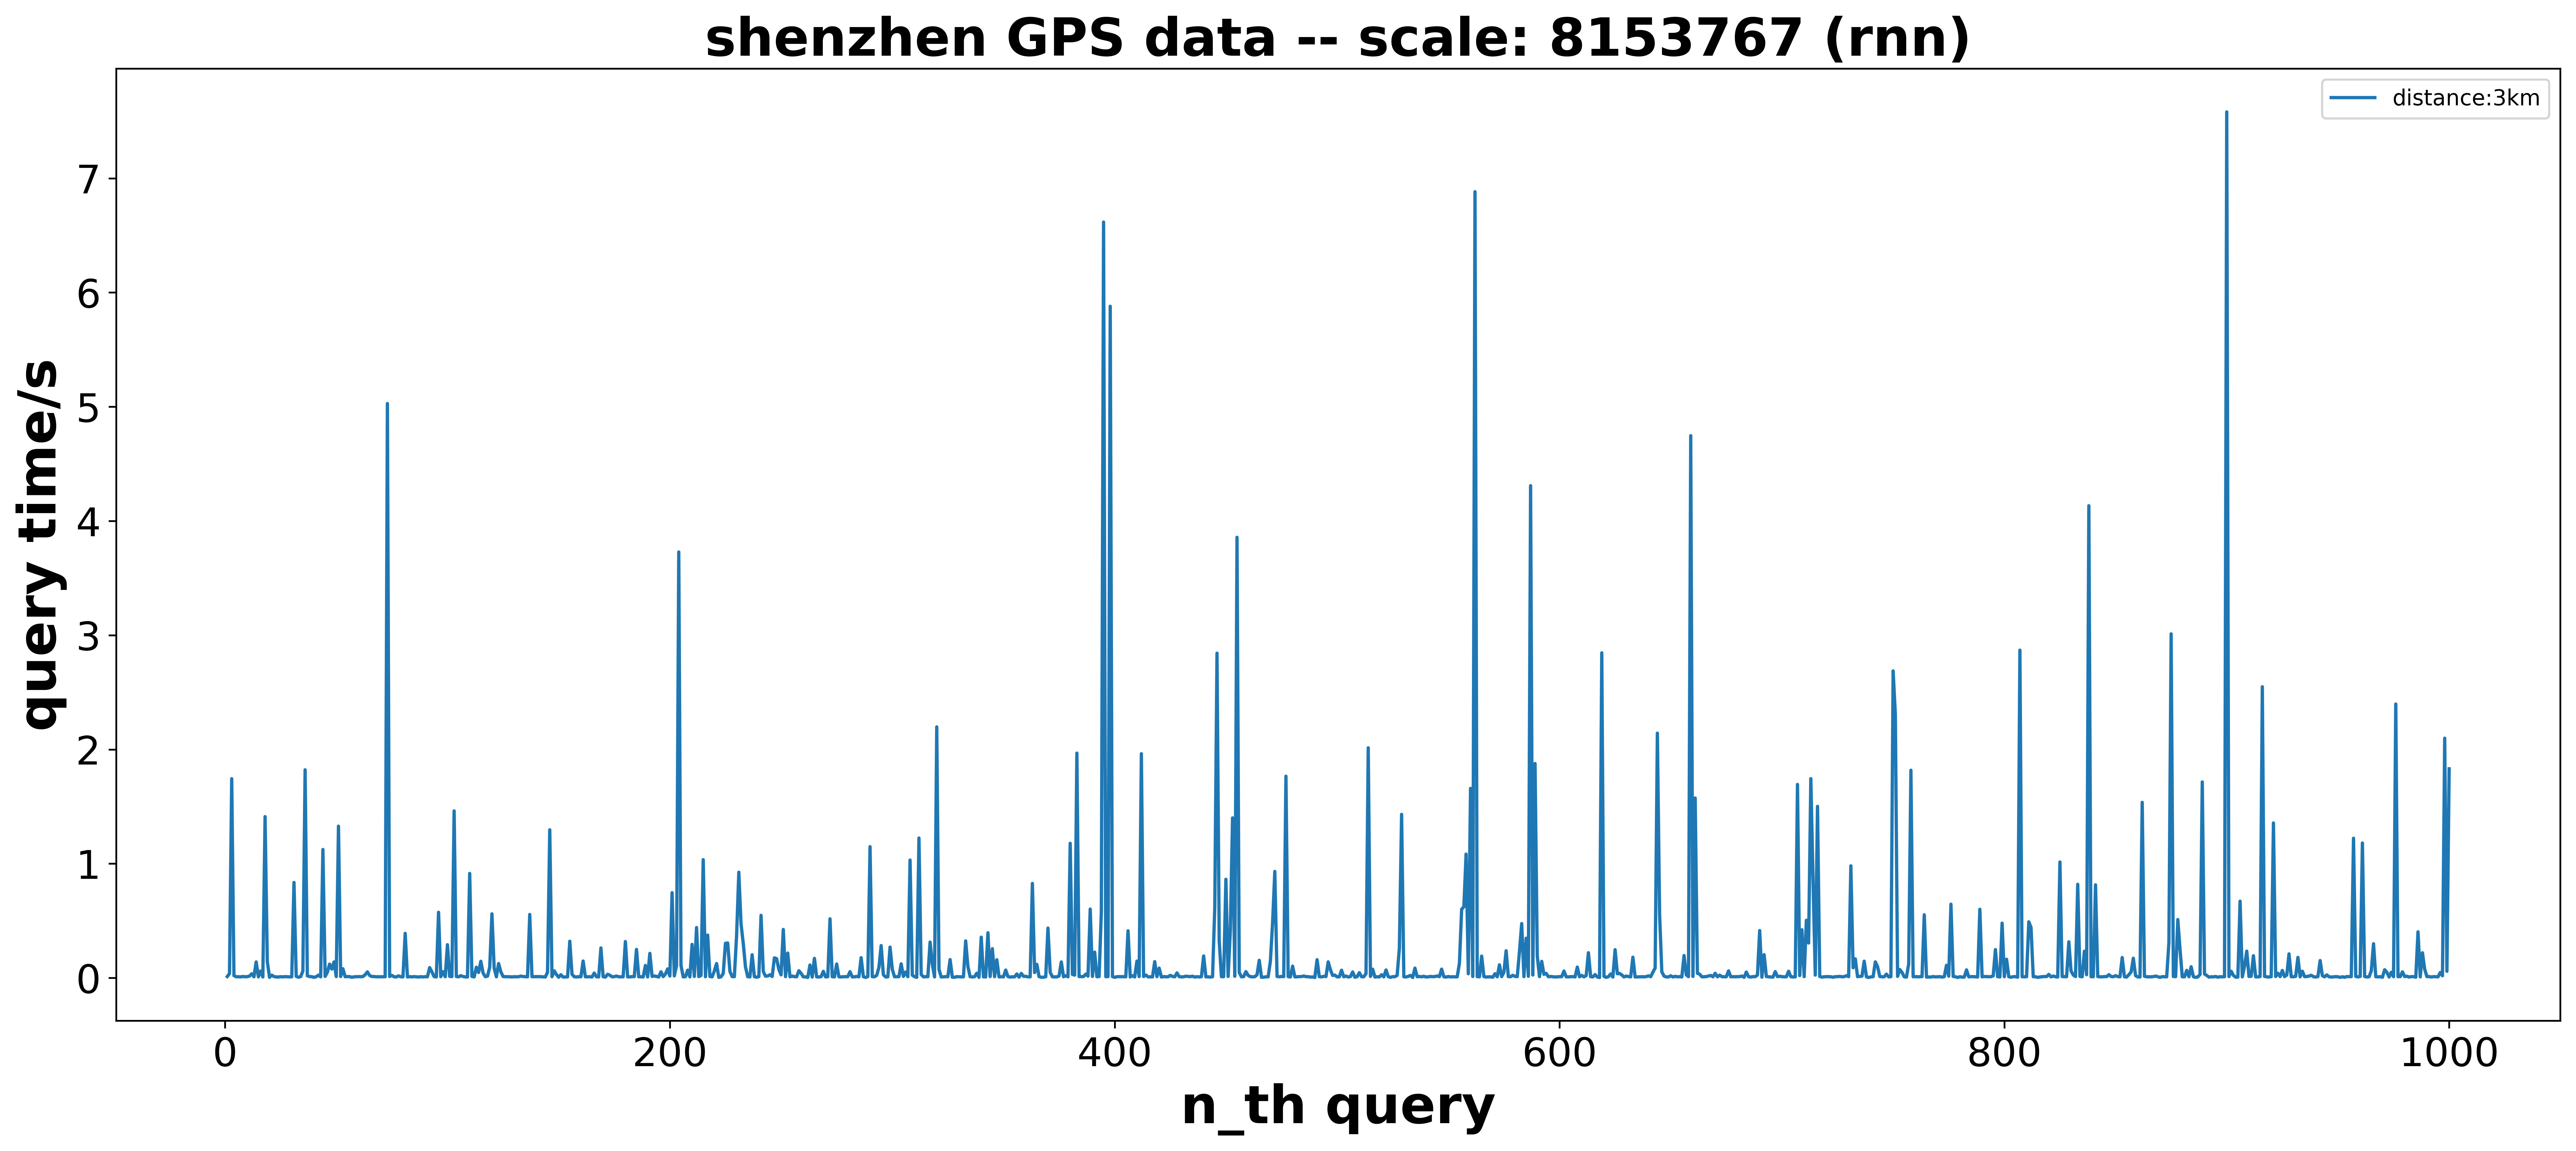

In [38]:
string = "12.049 38.351 1743.668 20.437 10.580 10.452 9.194 12.643 10.279 11.104 16.486 36.338 10.237 140.085 9.752 59.715 8.543 1411.930 144.579 5.446 24.180 12.015 8.769 8.411 10.897 9.285 11.286 10.585 9.362 9.812 835.641 14.134 6.340 11.180 60.429 1821.614 18.321 12.529 10.726 5.611 10.463 24.640 9.848 1123.940 13.667 49.590 120.835 78.080 140.042 12.207 1328.251 12.735 80.175 10.807 11.788 11.574 5.783 9.874 10.856 11.474 10.830 12.097 28.051 53.207 22.123 12.378 12.327 10.037 10.739 9.884 10.697 10.377 5027.732 12.749 22.508 9.998 8.540 17.887 10.438 9.519 390.133 8.775 11.226 9.172 11.746 9.615 8.281 10.823 8.701 10.770 10.455 90.521 53.592 11.973 9.081 574.569 11.271 54.638 10.799 290.812 13.849 11.878 1461.870 12.711 9.677 19.769 12.511 9.129 8.572 914.610 13.542 8.725 93.741 48.077 145.488 43.790 11.385 15.076 93.887 561.147 85.741 10.041 126.017 53.952 12.540 10.884 10.834 10.373 8.578 10.997 9.823 10.887 15.862 11.866 11.176 10.056 555.381 10.984 11.265 11.504 11.373 11.231 9.341 8.415 49.736 1296.460 11.025 61.822 29.400 6.630 27.761 7.948 8.192 9.455 321.112 31.733 10.595 8.644 11.283 9.906 147.759 10.307 10.048 10.600 8.248 42.460 10.590 8.998 262.291 10.604 7.528 31.722 24.322 10.091 11.239 16.639 10.166 9.881 9.823 318.393 9.253 9.479 11.814 11.352 249.590 10.401 10.458 8.448 109.035 9.223 214.697 13.730 17.308 12.989 8.643 53.564 11.704 34.273 78.928 17.371 746.289 18.049 108.198 3728.321 110.158 9.454 10.995 67.852 9.354 293.406 12.913 441.095 11.896 21.955 1035.191 10.836 374.950 13.076 9.482 60.369 125.449 5.153 9.722 39.039 303.328 305.822 57.123 11.986 11.074 369.762 925.197 473.088 302.000 96.546 11.241 8.944 202.770 11.486 6.625 11.257 547.949 55.879 15.774 17.366 27.479 12.559 175.728 168.220 75.104 27.193 423.930 11.552 217.191 10.122 16.319 11.470 10.270 62.793 40.595 9.559 9.490 4.467 113.149 8.077 170.877 9.564 8.596 11.205 57.455 9.426 10.915 517.343 10.961 9.122 121.553 10.577 8.816 10.737 10.979 11.054 54.703 9.420 9.637 13.109 10.272 176.884 11.200 4.535 11.691 1148.842 11.426 9.997 22.975 91.619 283.062 27.837 8.933 9.634 269.843 75.845 10.877 10.584 11.051 122.942 13.474 51.427 11.048 1031.615 24.148 10.906 5.094 1224.612 30.199 9.784 11.227 10.930 313.415 121.981 8.979 2197.378 75.049 8.686 9.516 11.415 10.820 160.422 6.902 5.697 11.310 10.210 9.279 9.790 324.047 100.018 11.085 8.600 10.789 41.105 5.212 356.452 9.173 9.019 395.200 12.237 255.429 11.074 159.075 9.093 10.898 9.632 68.759 12.131 7.719 9.680 9.632 34.375 6.689 39.145 14.215 13.817 9.546 9.687 826.749 47.318 118.699 11.890 5.932 6.180 10.830 436.196 49.344 10.156 9.260 9.283 17.324 139.846 10.384 19.156 10.262 1178.381 30.994 25.018 1967.632 12.109 11.692 11.983 33.220 16.056 602.632 13.490 225.725 11.099 11.973 578.071 6616.520 11.090 12.618 5879.221 11.908 5.362 10.549 11.386 10.718 11.371 9.722 412.374 8.363 19.499 8.828 147.030 11.962 1962.429 12.694 25.268 9.670 9.809 8.907 142.529 11.439 85.625 8.126 11.341 10.635 9.880 22.389 13.106 10.049 43.939 11.607 9.219 10.079 15.126 13.127 11.274 14.792 7.783 10.962 8.792 10.798 192.191 9.603 9.538 7.587 10.509 613.715 2842.417 320.371 11.242 11.172 863.529 12.932 416.259 1400.595 14.523 3857.162 47.670 9.878 11.457 54.978 22.592 11.112 9.779 10.786 27.436 153.956 5.518 6.851 9.683 9.579 145.113 483.402 932.080 13.121 9.940 12.914 11.379 1765.679 11.879 8.405 103.172 9.522 10.144 11.793 11.856 16.943 11.293 10.954 7.788 8.565 3.838 159.550 11.266 9.055 14.195 12.054 140.473 71.577 21.889 24.531 9.890 9.800 67.599 9.797 16.282 8.454 11.827 52.138 6.502 10.805 45.635 10.653 10.656 37.580 2014.388 13.166 76.591 7.930 10.501 9.126 27.973 9.190 69.588 11.335 5.253 11.162 10.870 22.319 260.132 1431.474 10.806 8.449 13.669 21.733 4.109 85.828 10.886 12.625 9.954 14.558 8.218 10.239 12.993 10.903 12.025 17.203 11.269 77.137 9.899 7.937 12.284 9.112 10.336 9.390 9.843 128.538 600.674 623.199 1083.882 36.881 1659.207 12.683 6881.948 11.639 9.786 191.044 11.570 8.191 8.859 9.880 6.013 36.852 10.151 114.390 11.919 49.963 237.530 11.478 11.261 22.856 13.736 11.661 231.691 475.523 11.243 347.474 14.847 4308.720 25.543 1876.843 192.032 11.424 145.049 31.253 39.988 10.424 12.737 10.388 8.402 9.861 11.094 11.199 60.040 10.127 9.251 11.065 11.338 9.145 94.624 10.227 22.006 9.588 20.959 220.578 11.360 9.195 29.016 8.804 3.846 2845.222 13.652 5.118 11.290 34.583 7.442 247.100 36.957 39.635 26.298 8.917 16.097 12.191 9.064 181.215 8.230 9.506 9.476 10.895 9.667 11.694 18.268 11.084 50.350 87.229 2142.352 558.772 53.705 16.400 8.802 8.933 18.615 8.507 13.989 9.981 11.416 8.813 195.827 26.608 11.562 4746.445 13.159 1574.790 40.747 32.907 9.965 10.426 12.008 16.835 21.847 10.135 40.342 9.946 24.080 11.496 10.093 10.598 61.263 10.578 10.892 10.440 11.146 11.470 15.747 5.779 51.274 11.024 7.878 11.374 11.275 25.319 414.550 6.880 203.408 12.269 10.116 8.255 7.488 54.902 11.240 14.657 11.283 9.906 10.376 58.327 11.154 8.624 9.451 1693.456 20.775 421.556 11.305 504.724 305.692 1744.265 851.567 25.102 1501.779 13.365 7.030 10.263 11.122 11.244 10.311 6.126 11.247 11.258 13.251 10.055 11.023 19.606 11.336 981.149 89.307 167.304 11.295 13.813 15.613 146.333 9.886 4.187 8.888 10.729 140.324 99.391 13.031 10.025 10.268 33.146 9.490 11.091 2687.442 2306.359 13.684 73.371 48.553 10.174 7.423 122.215 1817.970 10.751 11.243 10.030 10.663 11.659 552.567 7.856 8.158 7.962 12.139 9.155 9.896 11.369 7.493 11.184 110.737 15.967 645.097 13.075 10.549 4.351 10.488 7.334 7.594 70.314 9.674 11.400 11.481 9.985 8.566 600.731 10.243 12.488 11.499 10.784 10.781 18.352 248.191 10.876 9.160 478.972 10.867 163.439 10.847 6.147 11.072 11.081 6.861 2869.053 10.841 9.894 10.738 491.022 441.808 10.940 10.516 5.146 8.169 10.645 12.253 11.931 30.714 9.348 16.438 10.469 8.138 1014.613 12.239 11.336 10.490 316.170 60.127 26.002 12.292 819.429 13.535 10.398 233.824 28.258 4133.318 11.246 10.820 815.023 11.867 9.943 9.781 11.776 11.192 28.580 12.775 10.494 19.606 11.929 9.820 178.383 10.420 7.788 28.602 51.739 171.974 20.023 9.382 8.120 1536.891 14.812 10.099 9.781 9.734 11.623 15.843 10.805 5.223 11.067 10.617 9.455 309.884 3011.893 12.896 11.013 510.552 249.883 10.563 9.984 65.875 10.644 98.202 10.889 5.223 8.621 30.870 1715.611 34.151 21.728 7.389 10.178 9.292 12.837 6.535 10.733 9.894 10.478 7580.556 11.696 58.183 22.269 6.767 7.332 671.832 9.537 104.199 234.353 12.748 14.744 194.250 9.594 9.620 12.022 2548.927 13.734 9.818 8.354 11.051 1356.429 12.239 40.975 11.748 65.289 11.769 25.215 210.612 10.960 10.002 14.666 179.520 9.897 58.693 11.342 12.175 16.216 23.127 10.931 7.928 11.828 151.753 19.715 9.936 26.336 10.369 7.776 9.403 11.428 9.914 5.205 10.056 5.718 12.017 11.632 11.278 1222.868 13.270 9.072 12.856 1180.838 12.696 8.663 10.005 62.700 299.287 10.683 9.512 10.960 5.722 71.522 50.151 8.031 49.470 10.497 2397.403 11.743 11.432 53.063 12.219 14.874 8.074 11.535 11.187 6.315 403.430 9.478 220.014 75.635 11.616 12.047 8.521 11.212 10.937 9.535 47.408 19.209 2098.374 58.165 1830.730"
temp = string.split(' ')
data = []
for item in temp:
    if len(item) > 1:
        data.append(float(item) / 1000)
data = pd.DataFrame(data)
data.columns = ['distance:3km']
data.index = [x for x in range(1, 1001)]
plt.figure(dpi=600, figsize=(20, 8))
plt.tick_params(labelsize=18)
plt.title('shenzhen GPS data -- scale: 8153767 (rnn)',fontsize = 24, fontweight='heavy')
plt.xlabel('n_th query',fontsize = 24, fontweight='heavy')
plt.ylabel('query time/s',fontsize = 24, fontweight='heavy')
# plt.yticks(np.arange(0, 6, 0.5))
sns.lineplot(data=data)
plt.show()

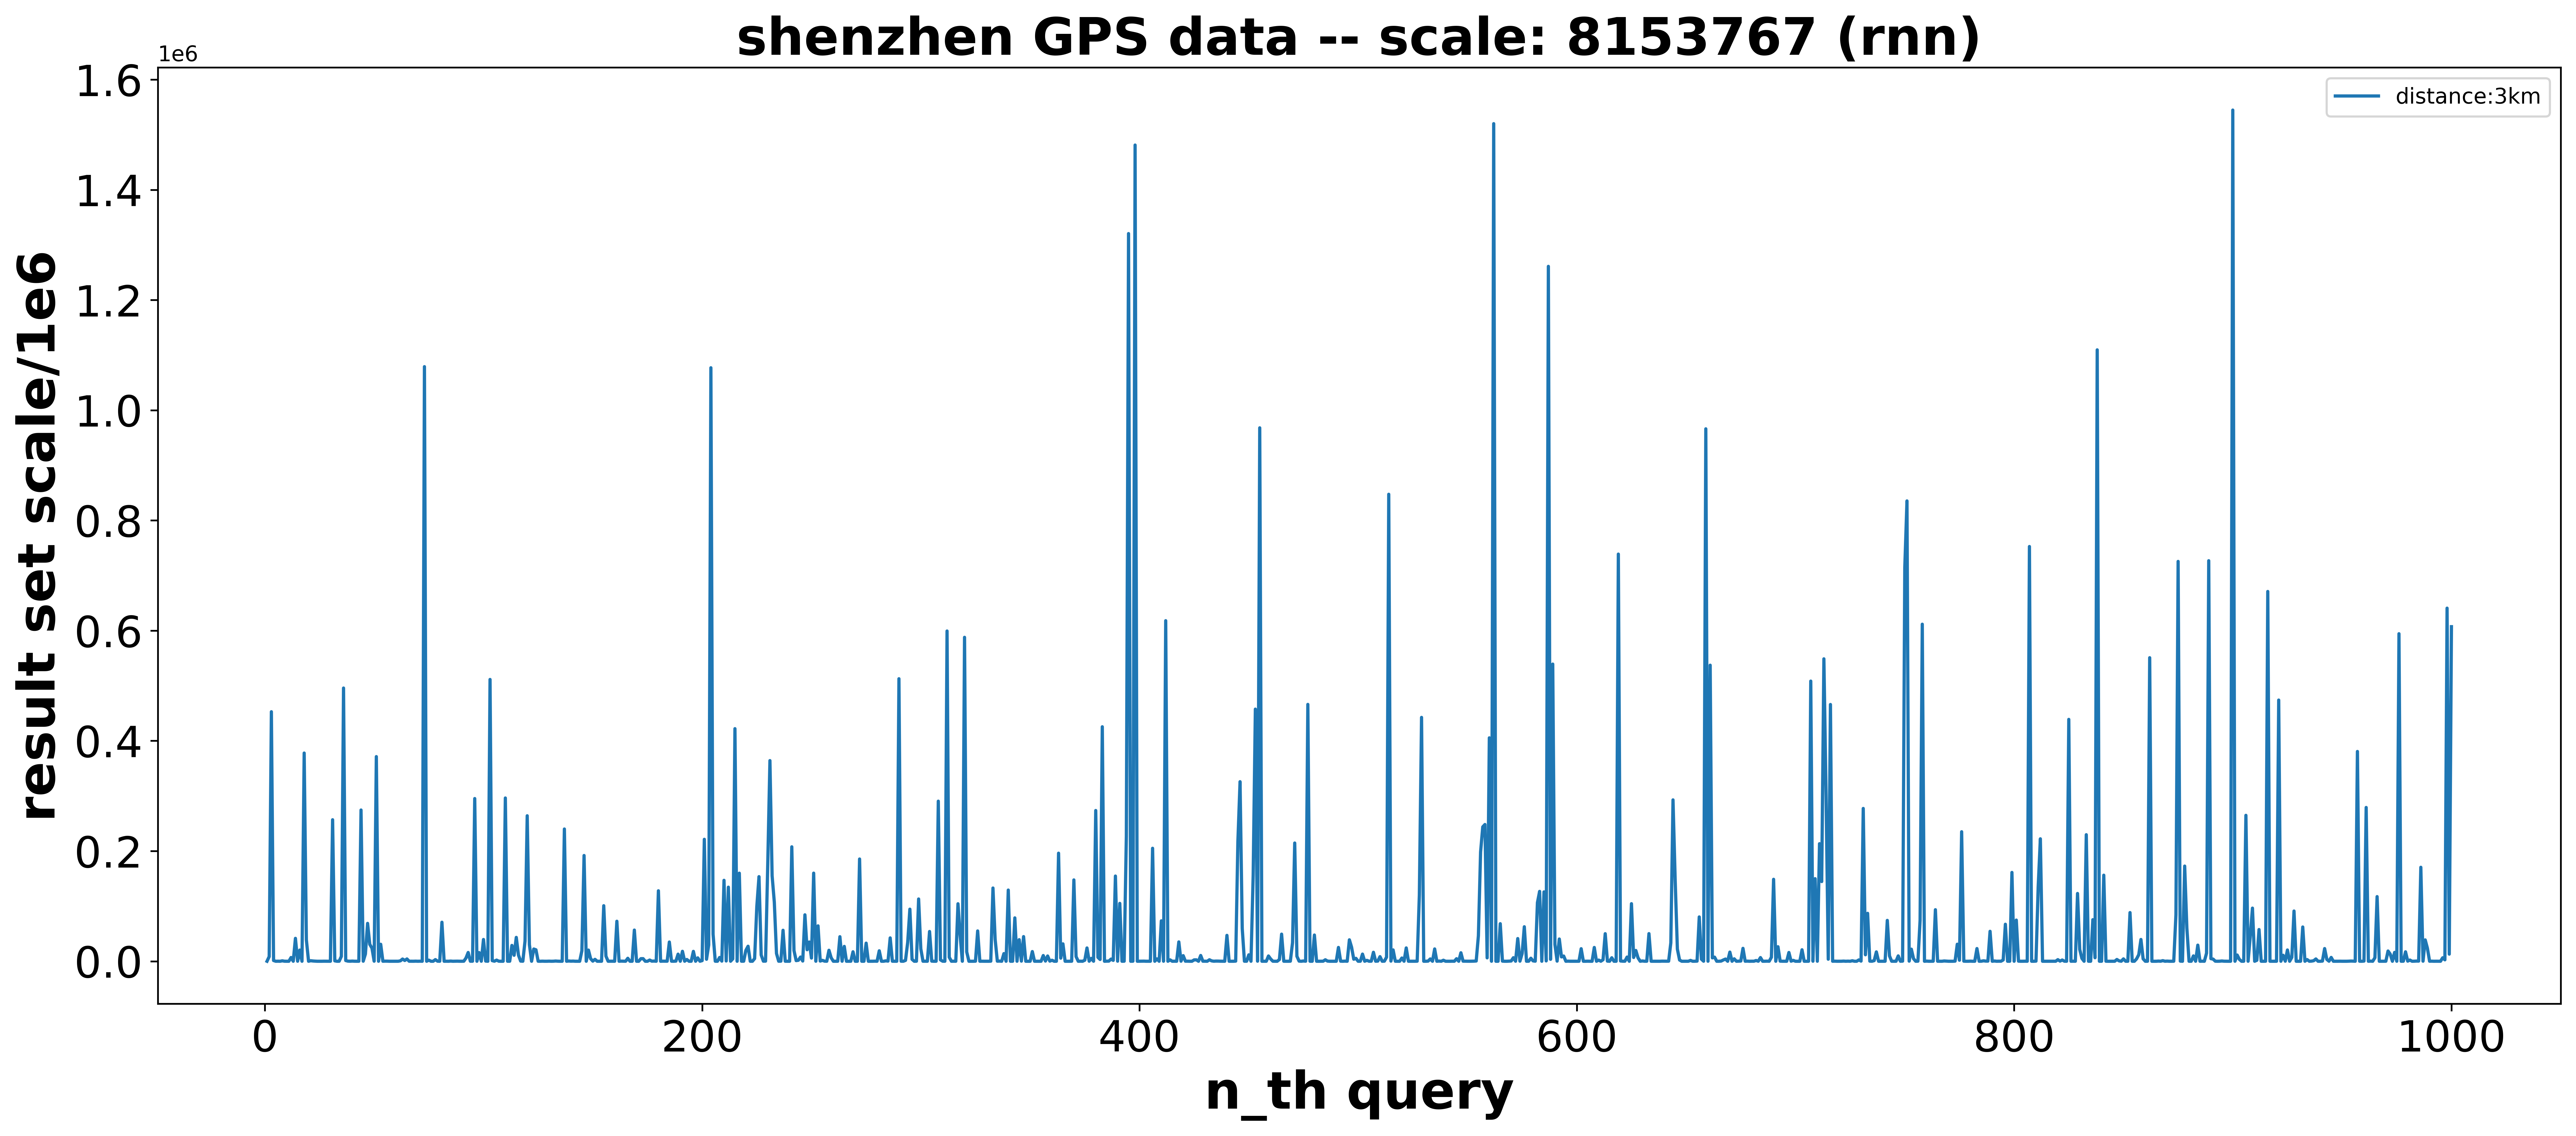

In [55]:
string = "0 8422 452790 1366 3 97 0 776 68 7 0 6783 0 41521 87 20312 2 377803 38938 0 940 484 200 0 0 0 77 61 18 0 256781 709 0 50 8822 495783 1278 230 47 278 48 0 16 274438 102 13159 68702 30630 23870 127 371336 10 30795 24 202 160 0 0 0 26 16 762 4009 1386 4158 74 27 16 157 0 139 0 1079025 0 1999 0 7 2964 141 0 70766 0 72 0 307 0 61 159 49 14 96 5849 15885 82 78 295243 0 15704 34 39462 300 23 511355 1099 97 2065 116 0 0 296244 25 54 28703 10873 43260 11118 267 50 36736 263998 30104 0 22194 20772 71 0 149 0 12 158 0 78 406 103 13 0 239961 0 461 124 280 0 0 0 19038 191881 7 20276 4626 220 3429 0 0 15 100767 9276 1 82 73 0 72565 7 252 118 10 5382 0 0 56542 0 0 4670 4704 0 0 2163 178 348 0 127849 0 177 149 91 34863 103 42 248 12883 0 18018 74 3202 0 17 17915 16 6118 13 1129 221272 3617 29618 1077035 49193 67 0 6873 263 146840 510 134392 30 4310 422066 0 159800 54 105 19843 27234 0 0 4839 99184 153506 11356 163 222 175611 364122 155113 107539 14171 67 144 56182 37 0 0 207636 19482 1144 1786 7610 402 84240 20911 34915 5803 159871 37 64207 342 1653 174 33 19917 6373 0 0 23 44529 77 26935 0 0 50 17187 0 0 185513 0 0 32822 0 0 34 159 31 18967 0 0 738 293 42348 63 12 0 512681 67 0 1560 34162 94480 3449 0 83 112963 22572 56 79 0 53978 223 0 0 290484 2479 87 0 599279 7268 18 97 4 104296 46635 35 587836 16949 0 0 0 119 54972 12 76 10 28 0 141 132864 39672 152 308 0 13866 0 129156 0 37 78674 37 39157 242 44709 0 2 0 17570 41 28 0 0 10345 338 9516 209 1810 0 0 196077 5622 31534 0 0 0 67 147569 8502 0 106 0 1897 24083 73 5218 52 273541 7100 3219 425503 0 183 267 3946 1564 154572 154 104982 0 82 227068 1320525 0 109 1481189 0 48 132 205 19 44 0 205000 14 4304 0 73311 53 618013 0 2508 0 87 0 35069 117 10148 144 150 1 0 2453 2552 0 10455 103 89 0 2692 692 67 303 270 96 63 0 46932 13 0 0 230 216583 325846 59412 60 69 11630 0 156448 457524 129 968012 0 40 0 9557 4090 72 0 0 3183 49179 45 7 0 116 33680 214523 9021 247 0 496 74 466092 18 0 47544 0 6 71 104 2673 305 0 0 0 0 25035 141 0 239 0 38886 25565 3716 5241 0 48 12973 27 1655 48 115 16258 69 293 8326 18 161 7444 847443 249 20575 29 10 0 5856 43 24151 27 35 0 30 123 120497 442521 0 31 272 4202 0 22304 0 349 0 1840 17 0 0 101 30 4573 0 15365 154 139 59 46 90 193 469 46322 198305 243843 248160 6195 405429 0 1520015 0 0 68124 228 0 0 204 473 6412 50 41146 171 13985 62580 3 109 5472 677 130 106395 126772 0 125858 622 1261046 3509 539266 30492 238 40329 7867 9469 0 192 17 0 0 8 40 22738 0 0 113 9 0 24989 0 2127 21 2731 49979 230 0 6327 0 0 738857 497 114 72 7589 0 104436 6872 19534 6213 0 505 43 52 50107 24 0 0 10 0 186 137 89 121 33378 292822 146366 22028 2241 0 0 12 0 1520 0 48 215 80401 3727 73 966204 49 537260 6161 7451 0 18 300 2283 3986 0 16580 0 4379 8 170 380 23385 69 237 0 96 69 1348 68 6640 0 45 176 54 7237 148673 0 26323 196 49 0 0 15881 129 1593 0 0 0 20814 0 0 0 508371 79 149825 46 213323 144626 548782 301906 3708 465925 54 171 2 41 35 285 0 182 0 880 0 7 2436 263 277268 11756 86951 191 32 1109 16974 0 0 0 14 74119 9733 46 0 0 9710 60 216 714606 835365 209 21922 4627 0 103 74515 611629 0 274 0 12 83 93503 43 0 0 513 274 0 12 0 223 30886 1857 234996 151 4 0 171 0 0 23020 0 78 812 300 247 54303 0 458 0 104 66 2327 67123 0 10 161158 17 74676 191 0 26 109 12 752616 0 0 227 134397 222181 0 14 0 0 6 37 0 2866 257 2248 98 0 438895 16 125 0 122971 21423 5227 0 229626 21 0 75436 6371 1109513 0 0 156141 59 0 0 2 0 3182 694 51 4273 26 0 88292 0 0 4310 11884 39492 4369 3 4 550833 0 0 0 297 60 1082 30 257 10 0 62 84415 725591 246 0 172678 60048 0 0 9688 13 29211 0 139 0 14741 726852 4689 3892 136 0 95 478 96 23 0 2 1544688 30 11310 3438 0 0 264775 20 45918 96392 1 1738 57518 0 0 25 671039 26 0 0 2 473955 39 10849 100 20428 2 7076 91113 0 0 0 62134 0 3055 29 233 984 4172 0 0 303 23000 3389 101 6926 0 0 19 81 0 0 0 130 352 235 0 380679 53 0 295 279049 0 228 0 6462 117283 0 17 0 44 18574 12922 0 16045 36 594352 0 89 17109 208 2172 0 98 342 279 170498 121 38722 23733 62 151 0 43 18 6 6307 2605 640753 12929 607150"
temp = string.split(' ')
data = pd.DataFrame(temp).astype('int64')
data.columns = ['distance:3km']
data.index = [x for x in range(1, 1001)]
plt.figure(dpi=600, figsize=(20, 8))
plt.tick_params(labelsize=20)
plt.title('shenzhen GPS data -- scale: 8153767 (rnn)',fontsize = 24, fontweight='heavy')
plt.xlabel('n_th query',fontsize = 24, fontweight='heavy')
plt.ylabel('result set scale/1e6',fontsize = 24, fontweight='heavy')
# plt.yticks(np.arange(0, 6, 0.5))
sns.lineplot(data=data)
plt.show()

# porto

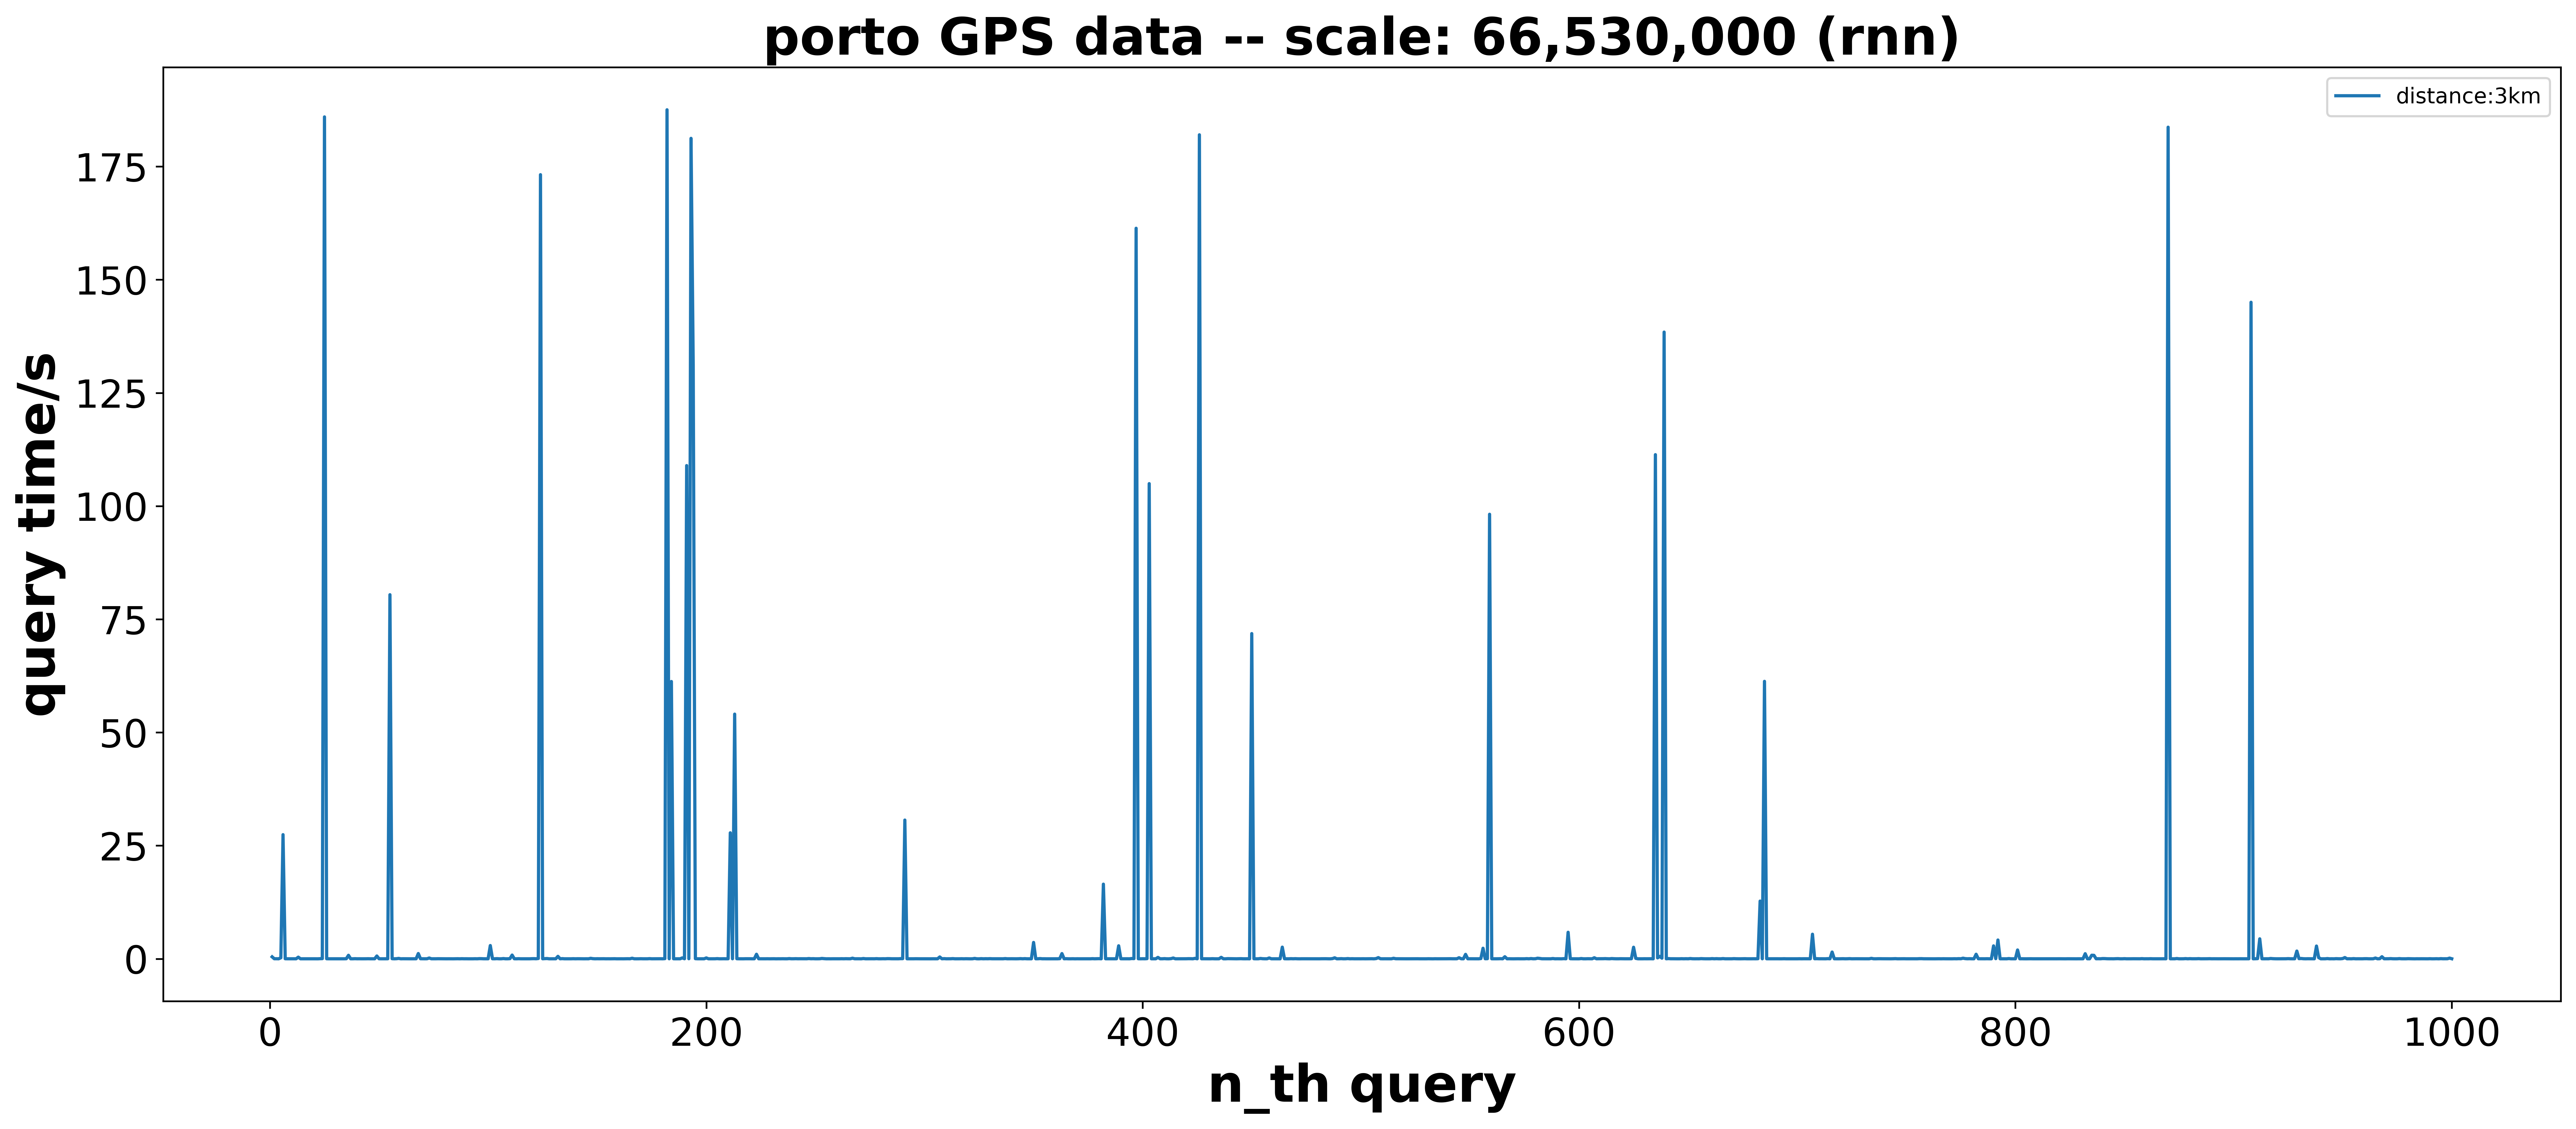

In [103]:
string = "440.232 19.812 20.830 10.329 233.458 27423.808 21.297 12.864 11.160 11.104 9.593 10.036 370.437 9.989 11.087 10.981 12.583 8.734 14.363 10.711 9.198 6.935 33.862 45.859 185947.524 18.370 11.099 11.656 16.893 6.723 13.797 14.408 11.429 9.654 24.565 782.238 10.646 10.837 31.046 13.178 17.423 10.123 11.656 14.125 24.507 11.767 11.637 10.637 626.533 19.567 10.857 8.815 10.283 16.853 80419.776 32.232 9.334 28.643 94.847 10.237 20.822 17.183 8.595 11.781 9.535 9.290 14.649 1169.025 22.537 13.483 10.300 18.014 180.709 13.723 12.474 13.849 25.968 22.289 24.552 16.956 9.571 14.330 9.097 6.777 15.441 23.154 10.506 27.172 12.756 14.755 8.429 9.587 8.312 20.592 10.115 43.482 33.154 12.623 12.740 11.974 2932.710 17.673 10.936 41.057 12.430 10.954 58.548 10.188 12.600 43.919 829.248 16.968 10.303 29.588 11.227 13.784 10.076 11.392 10.602 30.073 38.869 18.887 73.390 173186.539 14.691 46.086 66.902 8.582 11.636 10.843 11.265 548.816 13.080 43.774 11.095 10.699 11.104 10.690 28.059 12.068 23.756 21.284 11.712 7.660 13.361 10.679 113.776 36.225 10.703 22.938 16.149 17.817 22.964 9.404 14.498 10.444 19.403 23.999 7.283 11.007 11.349 7.044 17.506 22.743 12.783 130.853 11.048 7.843 11.672 23.788 11.372 11.453 11.520 41.754 11.023 12.887 13.164 13.247 20.795 11.299 42.220 187521.190 14.219 61247.835 14.960 9.206 12.743 9.609 211.628 17.539 108937.176 24.218 181212.414 131185.305 35.343 12.067 10.599 11.580 9.874 200.713 11.039 12.548 16.265 13.122 45.877 10.067 11.625 19.734 11.858 17.796 27834.447 14.614 54043.381 23.363 11.592 9.967 8.020 21.128 21.694 20.204 9.172 12.815 1009.326 13.502 11.351 12.369 10.998 16.947 8.819 15.589 20.199 5.446 15.123 11.842 20.112 10.993 9.417 52.576 14.603 16.628 32.296 16.038 20.931 18.187 11.164 14.974 59.748 19.477 32.683 10.116 11.099 20.665 85.651 39.935 8.789 13.008 7.775 14.428 13.861 12.099 12.083 25.900 12.666 28.927 16.662 14.365 139.703 15.242 18.248 14.939 6.202 67.339 10.889 14.440 19.206 17.960 11.521 38.342 10.218 9.669 22.372 11.926 41.589 36.524 16.133 14.373 11.478 13.420 39.659 40.984 30644.655 12.578 11.914 11.040 12.775 21.748 15.892 12.085 11.100 12.051 11.575 9.987 7.817 14.286 9.334 13.766 413.747 12.790 42.918 11.412 17.124 17.957 46.483 8.671 11.183 12.269 24.713 8.910 22.781 12.923 4.754 11.928 92.337 11.573 4.945 39.284 11.388 27.288 16.722 38.765 14.706 16.000 15.563 12.492 14.006 11.649 52.897 12.042 15.561 19.952 12.804 9.015 18.502 43.252 12.211 40.526 10.535 11.623 9.725 3617.647 13.929 18.401 56.689 12.450 14.975 7.598 9.739 12.573 9.088 9.347 11.434 39.702 1157.869 13.485 32.405 10.193 9.272 19.870 4.303 15.919 9.656 11.289 13.722 13.028 11.188 9.579 34.967 12.787 24.474 40.717 11.050 16489.730 16.130 14.663 14.952 9.624 9.673 16.305 2876.044 17.889 12.431 15.978 14.665 10.079 68.899 46.776 161353.232 20.055 10.712 21.423 13.151 42.801 104950.745 7.684 9.893 10.532 317.397 16.126 13.573 41.734 10.808 8.064 44.520 180.675 10.113 12.034 10.297 9.631 11.495 18.014 33.850 29.515 10.540 106.140 10.210 181995.283 13.027 17.386 12.670 12.215 11.687 29.339 9.666 6.810 14.139 329.206 11.297 7.377 40.469 33.688 20.745 14.388 11.190 23.758 35.518 14.336 10.623 18.275 6.094 71831.697 20.726 9.270 12.449 80.912 27.386 10.627 10.928 190.967 12.288 10.317 11.281 9.594 9.156 2579.187 21.442 11.277 11.745 34.633 14.935 33.643 11.303 5.688 15.925 14.756 11.739 17.742 10.402 15.416 13.988 8.342 8.871 20.948 21.295 24.083 11.296 6.536 51.570 225.320 9.701 16.264 40.960 10.096 14.788 54.723 11.405 25.050 11.753 13.760 13.259 11.019 18.405 10.016 16.121 21.176 25.714 6.175 56.787 269.008 20.659 9.866 13.557 10.334 10.143 8.570 120.852 22.236 18.753 12.517 9.807 9.894 9.885 11.212 11.858 17.498 12.621 18.385 9.495 9.805 13.735 8.208 20.717 10.248 4.393 19.078 12.056 11.748 17.621 15.206 17.145 21.320 25.457 14.911 12.343 16.818 246.062 17.558 8.445 986.850 12.304 17.104 11.754 12.348 10.087 10.236 57.124 2336.820 22.355 34.115 98187.426 11.131 9.591 10.712 16.933 32.120 11.613 465.159 9.313 19.982 8.861 4.753 13.447 16.784 10.008 12.149 9.320 39.842 9.883 58.355 11.019 20.658 137.406 86.143 15.012 13.115 10.285 14.559 9.015 64.727 7.643 18.030 14.179 6.471 39.766 10.555 5862.838 28.328 11.300 11.930 16.768 7.529 62.027 10.577 9.136 25.851 17.612 12.285 237.003 12.489 23.961 23.418 29.136 45.472 21.999 9.938 57.402 26.686 12.998 12.219 25.895 18.827 13.269 11.507 13.210 22.765 2556.043 105.207 11.751 9.638 9.494 18.934 14.110 19.653 22.079 9.197 111350.416 214.898 551.770 149.467 138421.367 11.991 52.672 18.237 18.239 10.853 9.568 10.221 27.644 10.305 24.108 10.879 61.401 18.346 8.736 14.064 10.652 45.046 20.775 10.828 8.868 10.082 45.678 13.200 35.480 12.708 12.143 53.842 11.266 9.783 11.152 12.212 39.600 19.694 11.194 9.780 18.020 29.420 11.652 11.115 11.575 18.005 11.946 29.583 12752.921 11.483 61282.590 13.390 14.750 11.723 21.756 17.746 14.307 9.692 12.375 25.122 9.580 9.880 14.295 13.434 10.126 10.044 21.642 10.140 19.140 17.600 14.516 14.709 5432.667 22.006 37.290 14.625 17.489 11.841 9.787 40.939 13.387 1496.175 15.481 12.475 8.232 16.495 27.558 10.434 17.985 42.565 10.848 16.249 20.179 19.385 13.093 13.793 10.429 14.202 11.946 106.617 15.052 10.554 25.053 27.758 19.331 17.527 10.501 14.793 10.826 22.052 39.707 10.084 13.894 14.158 22.892 11.083 9.901 13.056 13.743 14.151 11.487 36.456 39.246 15.476 13.444 11.550 13.833 12.819 6.673 10.994 17.498 9.914 20.741 13.067 12.772 11.296 8.162 22.867 11.059 37.173 20.357 139.886 47.272 15.448 31.673 10.916 10.127 1010.805 17.672 13.634 15.182 11.435 22.659 12.210 10.408 2858.738 43.470 4154.398 12.345 11.341 15.940 8.132 57.798 10.676 9.025 9.730 1953.547 13.373 19.063 9.396 8.039 14.061 20.372 11.211 11.840 12.470 17.108 12.976 18.339 11.749 11.482 10.320 12.581 9.848 11.609 16.529 10.410 9.895 6.719 16.558 13.459 8.329 9.647 7.038 13.499 11.059 16.295 1130.849 13.686 8.503 794.821 770.933 18.976 23.785 15.195 58.290 51.310 22.115 13.692 16.083 8.335 28.741 41.252 11.856 10.876 34.726 9.332 9.994 13.505 19.950 15.514 15.600 13.056 41.141 8.840 14.826 12.507 29.535 11.003 9.991 10.695 11.747 12.545 16.795 11.745 183676.953 12.142 9.308 10.683 67.290 9.694 12.728 14.057 47.959 11.383 39.448 16.182 16.483 19.654 41.590 10.655 12.085 10.073 18.147 33.321 12.011 17.953 12.135 11.621 13.569 9.818 17.397 12.105 13.035 9.513 7.808 12.168 9.402 15.002 10.728 10.170 10.627 14.881 145008.789 7.554 21.187 45.183 4414.533 15.926 10.972 16.455 14.165 76.344 34.151 16.813 10.107 10.487 9.554 8.133 17.920 43.981 19.048 12.494 14.297 1714.254 42.737 75.884 23.969 10.590 22.980 19.951 17.551 9.855 2819.536 267.372 7.955 10.379 12.206 55.373 8.306 16.654 6.141 39.375 18.793 13.266 59.922 282.215 12.808 19.949 8.043 45.761 10.618 15.392 12.340 10.910 31.285 34.010 10.952 9.574 16.901 175.016 10.307 30.897 469.285 15.695 16.749 22.107 47.887 16.147 8.992 12.000 48.875 12.609 9.608 9.088 35.138 22.654 11.807 4.667 15.143 11.174 17.320 12.644 12.046 8.584 28.481 6.338 10.379 24.023 5.571 40.006 14.413 16.527 20.074 159.129 17.983"
temp = string.split(' ')
data = []
for item in temp:
    if len(item) > 1:
        data.append(float(item) / 1000)
data = pd.DataFrame(data)
data.columns = ['distance:3km']
data.index = [x for x in range(1, 1001)]
plt.figure(dpi=600, figsize=(20, 8))
plt.tick_params(labelsize=18)
plt.title('porto GPS data -- scale: 66,530,000 (rnn)',fontsize = 24, fontweight='heavy')
plt.xlabel('n_th query',fontsize = 24, fontweight='heavy')
plt.ylabel('query time/s',fontsize = 24, fontweight='heavy')
# plt.yticks(np.arange(0, 6, 0.5))
sns.lineplot(data=data)
plt.show()

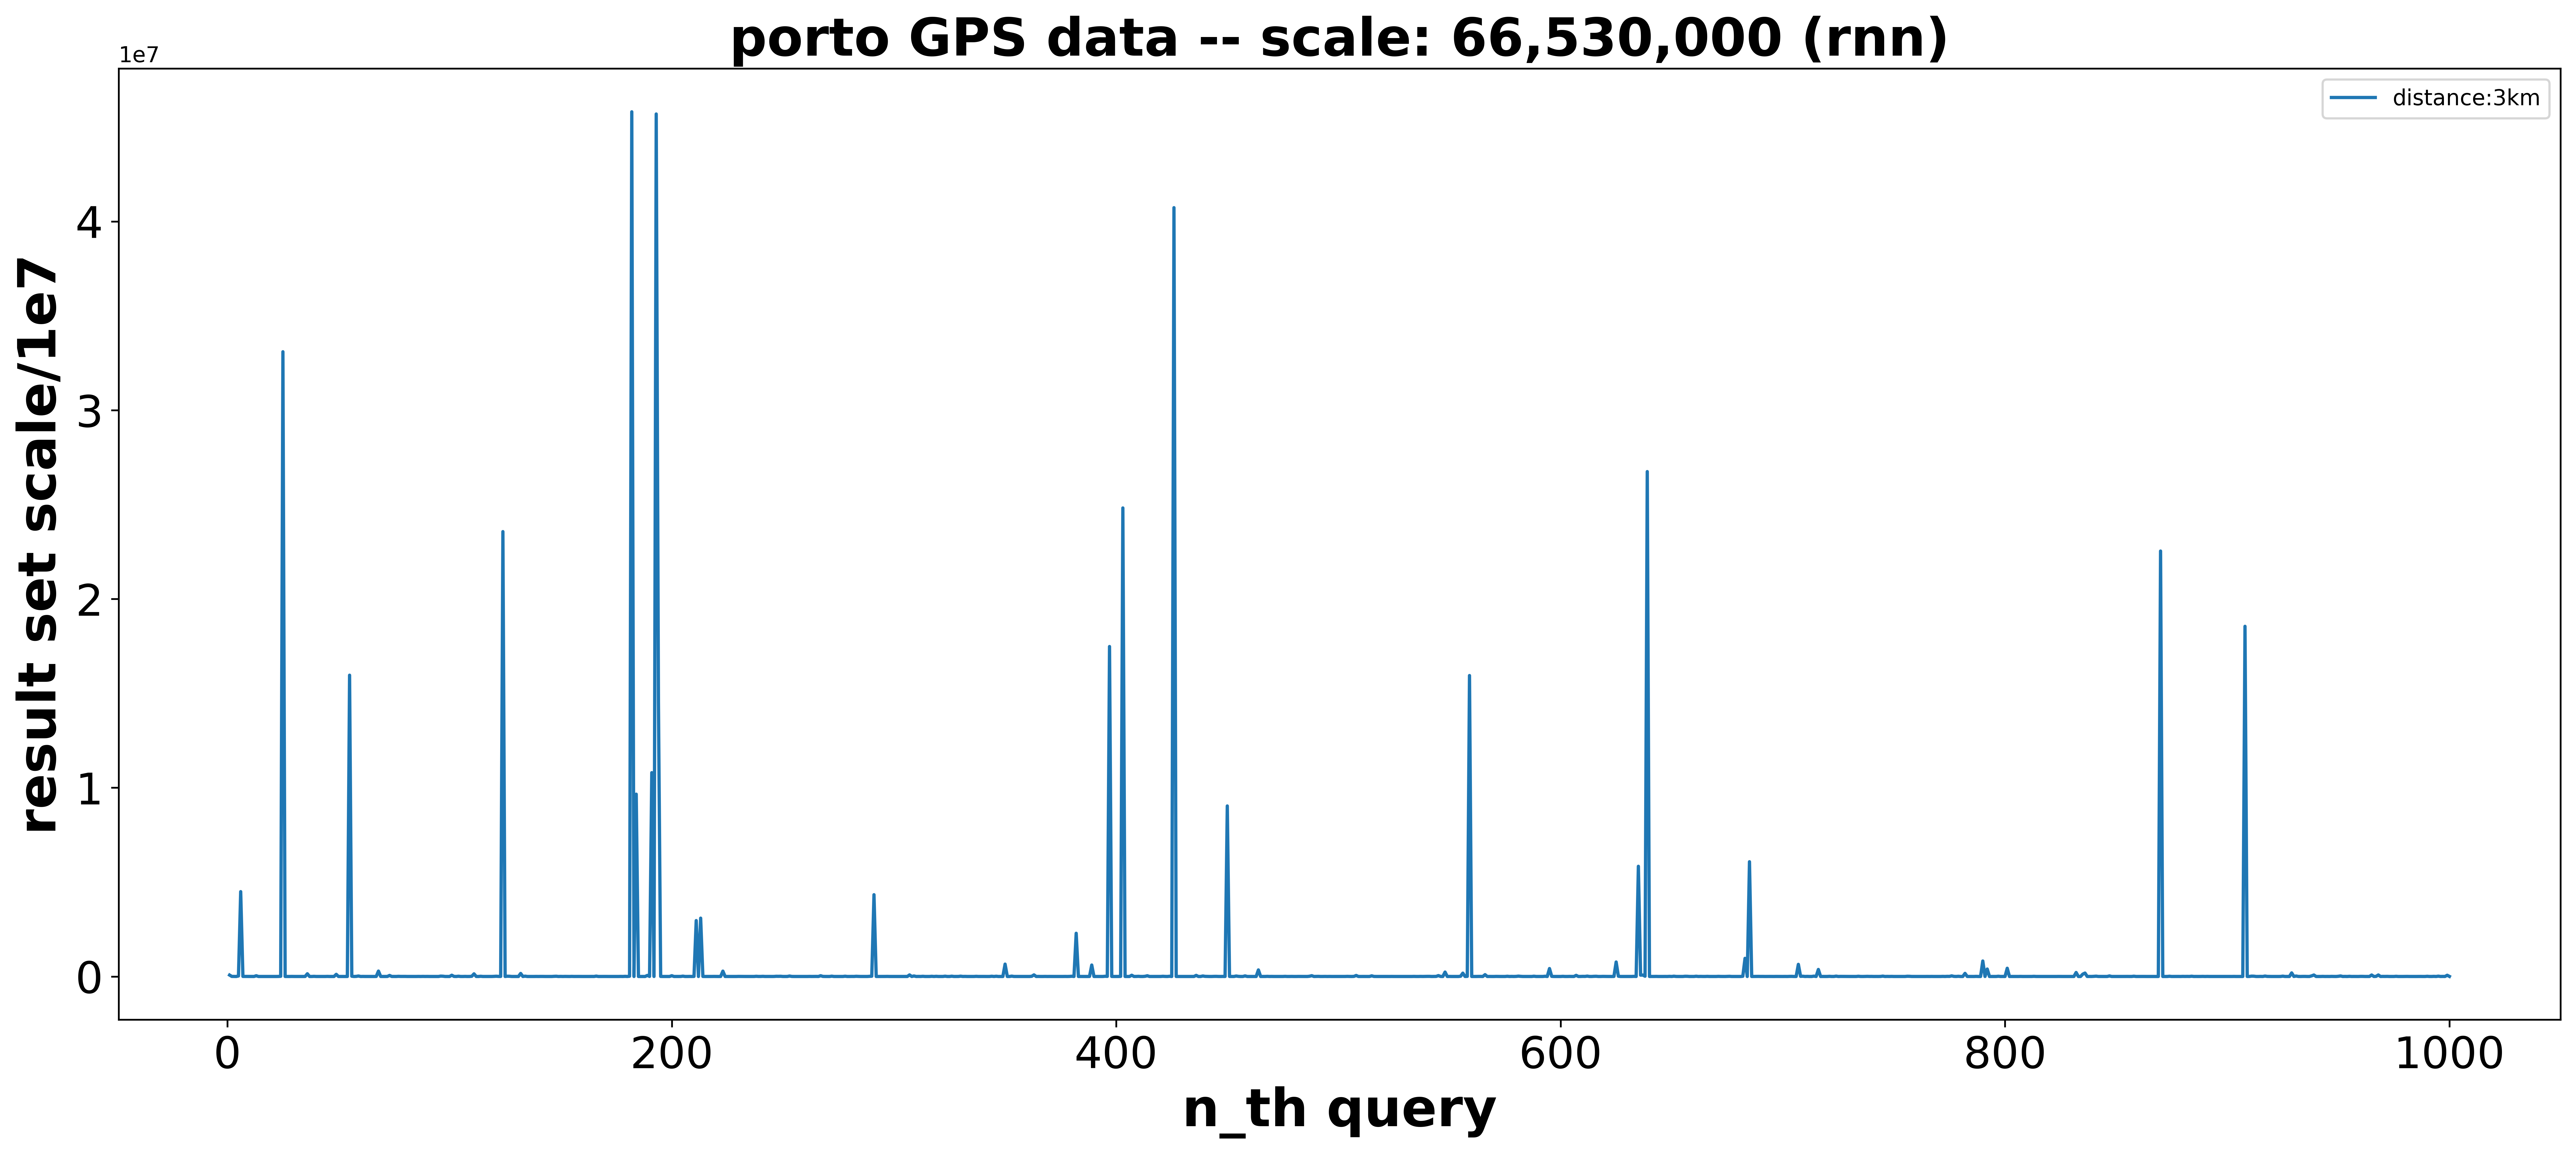

In [104]:
string = "74989 3820 2352 217 27450 4493277 3454 2557 602 234 0 264 38996 0 37 44 1245 0 908 44 67 0 2594 9085 33094283 397 27 0 2506 454 754 556 172 0 2125 143249 0 50 6523 0 14 0 174 122 3829 31 40 0 113480 512 0 0 0 596 15959575 14005 28 5255 24532 0 2739 759 501 0 55 0 2435 285556 1684 0 0 2047 54914 1110 422 715 7864 2903 2998 3394 746 341 0 0 280 2764 123 3384 687 2372 0 111 0 403 0 19202 14371 288 203 177 66471 3595 0 12947 155 143 3684 102 1072 11170 139968 635 0 10457 89 183 0 0 596 5470 12756 4126 2203 23565622 366 14268 10899 127 213 27 213 160617 0 16638 323 8 39 117 2295 511 2595 2209 36 10 224 55 7236 12010 0 3786 120 3122 2055 24 4524 580 1085 1620 375 32 0 0 371 1654 333 19006 122 583 62 1475 259 0 433 1225 72 158 2691 438 6612 500 12952 45805222 175 9656914 101 154 276 142 56033 4113 10796495 1347 45689309 14530083 3629 278 143 139 0 40771 0 232 1416 1227 16938 0 39 2360 774 3720 2960870 66 3089491 2577 186 0 255 887 2578 980 0 1331 283128 621 0 140 31 0 0 3872 2483 0 578 490 1320 8 148 9758 1810 1631 7258 394 1127 1368 37 1262 10167 8105 10723 408 24 1318 23114 2584 21 374 0 230 385 107 230 2725 454 1373 2855 343 39524 4041 709 838 0 15777 74 261 1730 56 0 13274 9 158 2175 907 9649 4133 477 650 435 263 7909 13761 4331085 0 141 0 141 1598 3687 372 665 310 379 0 36 868 250 547 82870 152 26693 185 2912 904 8965 0 141 192 9020 0 8365 487 198 524 14849 114 35 14598 125 1481 1862 15852 1246 3873 263 194 886 182 7654 1060 1547 1449 367 34 316 11770 118 12178 0 950 0 654177 22 622 17882 657 778 544 0 677 0 136 192 10449 84903 0 2770 10 0 2500 0 1159 0 73 768 221 38 0 1901 38 3017 12460 285 2288000 75 1095 201 0 0 2507 605964 305 226 1453 349 0 11139 4707 17478589 2020 29 1049 760 5106 24819153 0 149 7 65434 960 2182 7736 161 34 9330 37977 159 215 814 0 848 688 9193 2601 0 10719 0 40726818 182 388 360 329 151 2348 0 0 448 58052 0 0 25782 6269 3733 135 370 4971 6308 1514 210 2697 0 9032203 2437 273 221 24042 6274 0 94 30654 137 0 94 0 117 346695 626 1300 651 6106 735 2431 93 44 349 664 412 6361 222 285 2623 98 109 2474 2244 908 0 375 12030 41520 0 2821 5950 0 554 2791 122 2120 287 496 710 2 1500 115 959 5307 1859 151 4844 53368 1308 0 817 40 0 176 33862 2312 346 563 0 0 0 603 101 1693 183 823 0 0 537 11 1514 0 0 3343 184 171 3322 868 3259 5654 5574 2 1168 3872 46899 1847 117 233496 33 2740 3 0 0 0 12786 177108 924 6592 15941523 0 0 0 2597 3128 223 96663 0 1753 32 12 3893 1342 82 500 38 11047 220 3229 184 4481 18148 7085 396 555 265 1970 0 13285 0 446 1161 516 11588 51 419436 7209 30 113 491 0 7028 0 37 3124 811 849 59159 505 1500 5444 3538 18774 717 0 7511 10686 115 261 4352 2185 1166 861 83 3371 766495 14759 93 105 162 422 646 643 6526 0 5836432 71251 76159 14184 26745394 62 1675 810 3414 179 0 10 1269 0 5899 137 14211 1092 0 577 2 10606 9114 475 0 10 12444 369 3676 872 569 5523 278 0 0 217 6240 1482 0 0 4013 8412 78 250 262 1311 53 11488 960122 0 6077712 184 1135 732 3999 1945 2227 0 672 1680 387 30 2111 1240 0 0 1617 0 4265 5603 476 210 641906 8084 13048 228 4194 49 138 17490 405 371263 351 1138 0 859 7404 0 573 17848 72 4072 3014 873 0 827 443 988 166 11659 778 0 2413 6459 2491 3230 0 988 229 2720 18275 0 3537 1046 3941 84 16 467 106 460 362 11409 8896 832 133 182 881 384 0 28 1473 10 1756 116 131 128 9 4218 509 6559 4046 31725 5069 873 9757 0 517 164166 1092 663 1063 0 4764 501 0 819086 1182 393951 0 0 488 81 11499 99 1405 81 435221 601 270 35 0 28 3367 0 19 286 491 796 7300 615 149 407 213 467 166 349 614 141 0 1823 673 50 0 209 120 0 145 210755 174 507 124437 180636 752 1943 648 7085 15962 1514 633 803 51 1003 28801 40 7 1442 0 85 522 1022 2054 655 807 13552 0 640 458 1517 0 0 0 39 509 1036 390 22536183 57 0 249 11112 0 531 730 1708 34 4355 1817 3835 1296 13180 38 1473 448 1242 4331 134 3402 591 694 137 565 305 73 731 0 0 882 0 2521 0 325 0 447 18548996 0 2541 17565 14581 143 21 3417 283 21935 3872 1328 169 0 135 65 1150 16727 548 192 460 189472 2146 23704 2373 0 3535 3574 320 0 32666 78229 0 0 301 4239 41 1351 0 4546 1528 344 10140 27556 137 3006 3 7986 111 1365 636 0 5066 4345 178 249 887 78719 61 6886 80229 46 3444 2149 4553 0 27 106 8872 91 0 0 2074 3137 429 15 583 6 980 1833 100 0 9276 449 0 5531 72 16320 222 2610 1309 64856 3439"
temp = string.split(' ')
data = pd.DataFrame(temp).astype('int64')
data.columns = ['distance:3km']
data.index = [x for x in range(1, 1001)]
plt.figure(dpi=600, figsize=(20, 8))
plt.tick_params(labelsize=20)
plt.title('porto GPS data -- scale: 66,530,000 (rnn)',fontsize = 24, fontweight='heavy')
plt.xlabel('n_th query',fontsize = 24, fontweight='heavy')
plt.ylabel('result set scale/1e7',fontsize = 24, fontweight='heavy')
# plt.yticks(np.arange(0, 6, 0.5))
sns.lineplot(data=data)
plt.show()

# chengdu

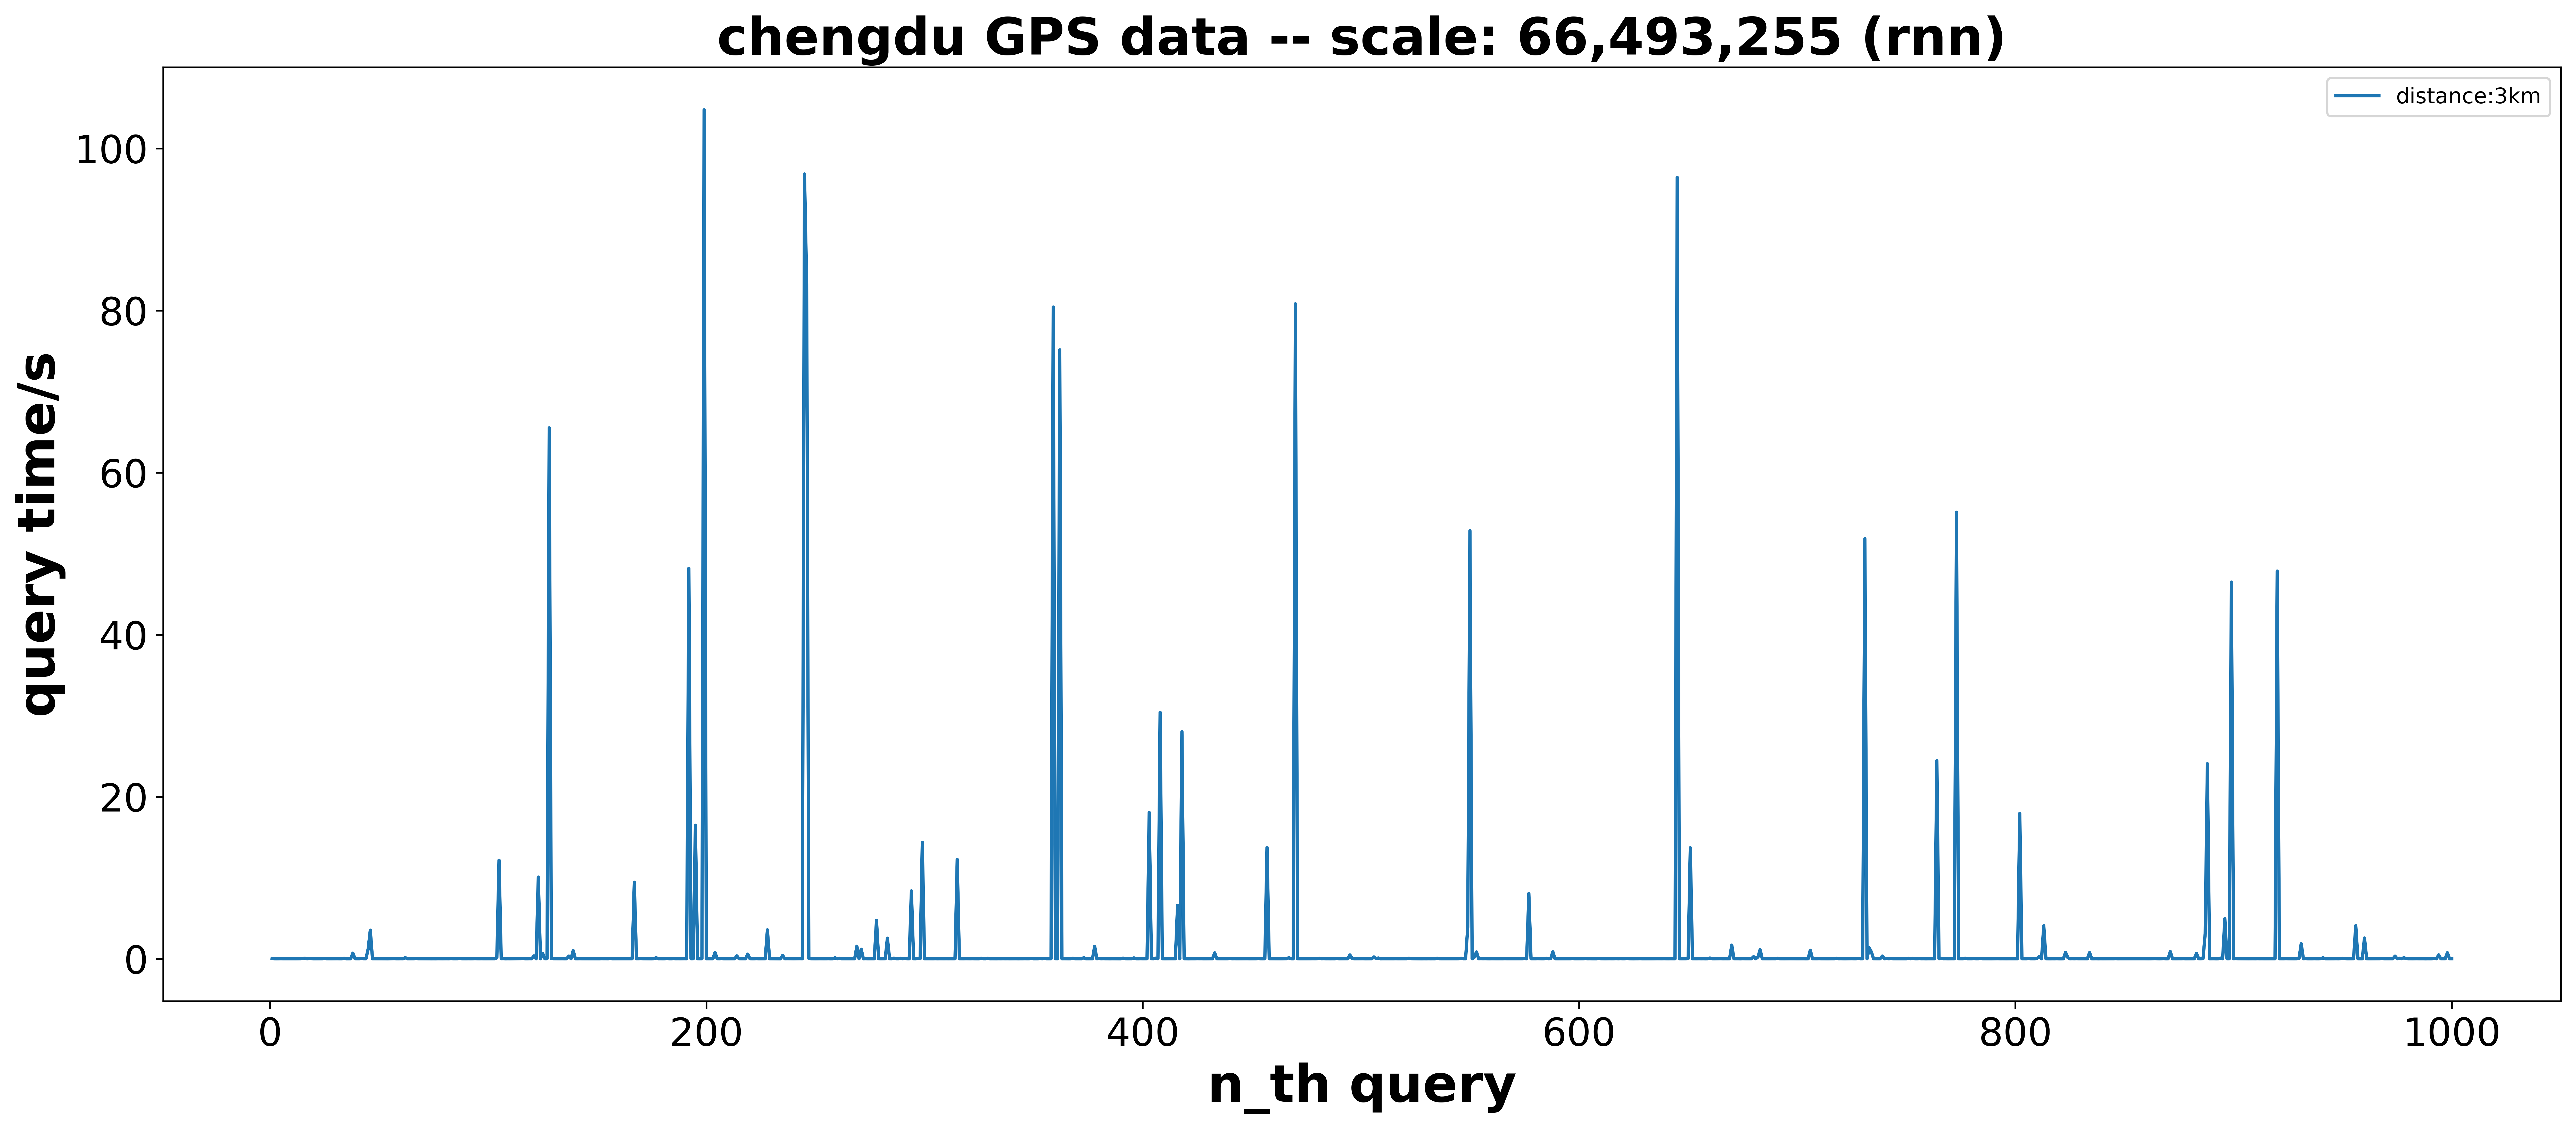

In [121]:
string = "44.845 11.192 7.697 9.776 15.478 10.115 10.687 10.927 9.306 13.258 9.617 8.982 12.094 13.884 42.587 78.554 9.892 32.681 24.485 8.026 9.720 9.871 9.848 10.425 42.440 11.352 9.216 9.960 11.532 11.202 12.813 8.268 8.362 66.881 6.755 10.022 9.837 702.463 15.006 10.995 11.619 40.765 11.177 9.707 1190.608 3539.545 11.388 10.332 11.572 11.359 9.922 10.540 7.915 5.379 12.712 16.407 23.131 9.050 8.798 13.873 8.903 153.374 9.991 10.079 10.144 11.184 35.174 11.816 11.453 10.987 10.023 11.188 8.679 4.979 7.572 4.795 12.925 10.613 8.659 10.310 11.688 8.244 27.160 10.470 9.604 12.320 47.315 10.350 8.649 8.675 12.503 9.328 11.092 20.834 11.804 10.201 13.769 9.696 10.704 10.921 10.572 9.133 10.581 127.752 12175.569 16.287 22.402 4.385 11.596 8.328 10.524 9.638 17.550 17.510 21.732 34.959 9.244 9.475 16.201 10.362 366.442 6.413 10088.207 13.346 657.486 14.496 16.199 65519.295 44.389 14.546 13.063 9.764 10.621 12.239 7.059 10.753 341.856 13.314 1023.229 12.007 9.006 14.761 10.628 10.044 10.578 9.068 9.149 4.267 10.403 8.370 7.208 18.492 13.744 13.799 8.380 38.403 8.830 11.343 10.662 10.434 10.113 10.613 11.012 11.146 11.832 10.786 9457.260 13.101 15.103 25.662 12.434 11.100 11.403 9.853 5.835 18.502 146.439 9.944 12.338 8.111 11.053 39.020 9.268 8.486 26.959 11.025 13.972 9.979 11.545 14.814 10.579 48192.276 11.308 15.608 16491.196 13.264 10.554 11.724 104760.275 10.699 11.005 8.851 10.684 779.881 15.179 11.148 28.814 9.284 10.647 8.994 9.424 8.119 10.535 367.207 14.020 10.227 10.734 9.432 581.273 15.788 7.829 9.158 21.408 8.834 9.971 10.275 10.203 3577.479 12.082 9.274 9.817 9.141 10.090 4.615 426.147 11.953 16.695 13.863 10.574 10.651 12.162 11.977 16.921 9.930 96841.859 83251.441 51.496 11.577 9.867 7.583 10.332 11.434 8.805 9.016 9.836 16.071 4.691 7.618 125.041 10.621 69.771 10.583 10.766 9.727 10.809 9.838 11.131 9.739 1556.504 12.622 1189.223 7.718 18.325 9.554 8.554 4.725 10.003 4750.032 17.684 9.677 10.914 13.624 2546.330 16.562 9.011 90.519 12.402 10.014 70.227 9.812 56.118 11.962 8.828 8388.392 11.989 9.075 57.108 17.867 14385.756 10.948 11.516 11.481 8.928 8.636 15.346 7.351 12.001 10.333 9.871 11.783 9.698 11.272 9.205 11.513 12265.521 12.688 9.992 9.776 14.904 14.070 10.346 16.174 8.788 8.048 6.590 75.669 11.413 8.340 71.481 7.762 10.494 9.115 7.125 12.639 8.466 15.006 9.606 12.024 8.114 9.481 12.670 11.497 5.511 10.808 10.203 15.634 10.029 11.494 52.810 7.977 9.706 8.877 35.519 11.275 47.630 9.664 10.841 10.507 80424.470 17.271 10.924 75144.596 10.062 13.110 10.344 8.139 8.434 74.850 11.124 12.063 10.797 8.301 141.237 9.641 10.882 8.627 10.860 1546.688 11.485 30.954 10.765 19.862 10.884 10.283 5.491 11.529 10.286 11.449 9.758 5.132 91.767 15.737 10.460 10.674 12.293 115.106 9.937 8.196 16.321 10.031 10.611 12.006 18058.718 19.800 9.712 89.382 9.750 30419.751 13.449 8.682 11.582 11.577 10.828 10.101 11.121 6597.675 14.649 28034.234 12.855 10.721 4.609 9.461 9.895 9.596 18.396 13.753 15.090 7.307 9.626 9.462 11.249 11.479 743.339 13.106 10.801 11.240 10.098 10.207 11.645 40.859 8.609 14.690 9.907 11.157 11.453 10.693 13.499 12.783 8.349 10.291 11.642 10.842 30.521 10.542 7.967 11.588 13749.777 12.364 11.354 10.976 9.844 8.834 9.371 9.922 14.865 17.310 144.124 12.643 5.822 80821.251 13.759 9.652 10.624 14.883 10.422 9.741 11.518 15.226 12.392 17.932 67.851 12.156 21.392 9.466 11.093 7.324 9.637 7.934 35.255 9.564 10.957 10.629 14.523 12.447 485.651 38.681 10.841 10.368 9.787 12.899 14.954 6.869 8.653 9.400 11.122 235.235 28.625 104.976 5.893 11.301 11.203 11.047 8.920 9.558 9.087 14.713 9.576 9.523 9.592 7.711 11.218 78.328 20.933 13.137 10.935 10.764 9.648 4.655 9.371 5.401 11.535 6.942 10.046 7.611 77.892 13.942 10.102 10.685 14.035 10.585 10.709 12.593 10.752 10.402 15.564 75.595 10.120 11.708 3911.970 52826.868 11.522 193.176 854.798 13.976 21.436 13.151 18.311 10.177 7.395 13.100 10.165 9.819 11.341 10.204 9.356 16.573 11.304 10.541 10.528 9.577 11.509 11.135 10.629 11.988 32.628 9.257 8059.621 11.252 11.007 11.001 19.698 13.701 9.407 10.505 68.678 11.988 30.336 869.743 13.629 9.063 10.069 11.000 10.049 10.257 10.473 10.389 31.473 10.053 11.588 11.102 10.722 12.340 29.228 10.241 14.983 8.583 7.150 6.920 49.171 14.046 9.975 9.247 10.644 13.949 9.889 11.060 21.789 8.898 21.310 10.080 11.867 39.642 12.838 7.889 5.345 10.823 10.900 19.488 7.397 7.255 9.830 9.739 9.094 9.262 11.527 13.270 9.828 9.744 15.388 9.659 8.655 11.309 8.967 8.078 96422.038 12.699 9.463 10.616 11.727 31.086 13705.938 11.226 10.714 9.946 14.376 8.726 11.560 4.707 11.271 103.355 9.921 8.544 10.794 9.742 17.687 8.626 11.181 9.764 12.941 1692.068 12.814 11.826 12.462 4.474 18.391 11.707 11.379 10.473 9.975 269.150 11.449 225.998 1121.151 11.907 10.721 8.821 9.750 11.513 13.137 10.050 73.377 11.109 9.174 8.687 10.372 10.835 12.798 11.093 10.329 10.317 11.544 11.350 11.482 6.268 10.467 1068.668 13.550 12.287 10.711 18.236 10.720 9.448 7.734 8.439 11.094 11.598 10.257 74.630 10.914 16.524 9.723 8.444 11.103 10.342 18.054 11.107 10.726 52.457 9.338 13.109 51845.158 10.179 1356.968 852.646 14.278 11.348 11.052 10.683 345.652 9.919 35.078 11.477 32.666 10.870 10.790 11.270 10.233 13.031 10.776 7.972 64.647 10.948 61.076 10.798 10.751 26.797 10.767 14.194 4.561 11.671 10.769 8.599 9.691 24453.668 12.675 65.949 12.743 15.659 8.201 11.800 11.965 9.788 55101.816 13.188 10.015 9.749 82.814 11.758 10.372 11.973 29.299 10.049 12.337 46.165 11.008 9.613 10.293 10.034 8.823 10.702 11.483 16.834 9.624 11.228 9.162 8.709 10.788 8.449 9.568 11.039 10.296 17946.305 11.879 11.780 8.771 37.241 9.772 7.529 8.660 81.352 279.550 12.120 4085.095 13.012 6.912 5.417 9.627 7.194 17.265 5.193 3.729 10.231 806.293 162.376 7.932 18.982 9.544 20.150 10.983 11.608 10.949 9.038 8.446 774.499 8.767 8.042 13.344 5.201 10.697 8.437 9.949 10.259 11.382 11.017 9.326 22.571 6.477 10.422 10.701 12.262 10.289 11.134 10.569 9.361 10.476 12.362 9.606 9.789 11.252 9.284 8.651 10.461 16.321 22.680 12.883 7.482 14.514 25.802 7.420 10.231 905.290 11.343 10.113 10.212 13.002 11.591 20.137 8.630 10.178 10.262 9.512 11.271 685.070 14.247 11.798 25.850 3131.177 24078.062 8.297 9.944 14.072 4.619 9.584 90.667 11.031 4965.122 12.462 12.987 46487.780 12.955 25.543 13.839 12.271 9.842 9.322 8.301 8.896 11.793 11.411 8.125 15.980 9.592 11.444 9.151 10.667 9.577 10.400 11.257 9.034 47845.756 12.162 9.428 10.029 19.608 11.949 9.879 10.511 8.353 12.791 64.978 1867.816 13.630 26.161 9.144 9.598 7.932 15.307 8.718 8.273 22.716 135.641 11.442 8.252 8.996 11.004 10.359 15.004 8.546 21.803 59.292 29.444 10.286 10.789 11.868 15.526 4096.400 11.955 9.802 9.716 2576.190 13.468 9.161 10.607 12.746 11.860 12.692 13.534 41.715 11.575 11.979 9.936 9.856 11.187 336.371 9.899 81.331 16.431 132.745 56.303 10.414 11.776 9.038 11.229 14.811 10.493 11.257 11.885 3.938 10.258 7.724 11.048 55.781 10.024 492.240 12.859 11.570 13.431 757.402 12.182 12.056"
temp = string.split(' ')
data = []
for item in temp:
    if len(item) > 1:
        data.append(float(item) / 1000)
data = pd.DataFrame(data)
data.columns = ['distance:3km']
data.index = [x for x in range(1, 1001)]
plt.figure(dpi=600, figsize=(20, 8))
plt.tick_params(labelsize=18)
plt.title('chengdu GPS data -- scale: 66,493,255 (rnn)',fontsize = 24, fontweight='heavy')
plt.xlabel('n_th query',fontsize = 24, fontweight='heavy')
plt.ylabel('query time/s',fontsize = 24, fontweight='heavy')
# plt.yticks(np.arange(0, 6, 0.5))
sns.lineplot(data=data)
plt.show()

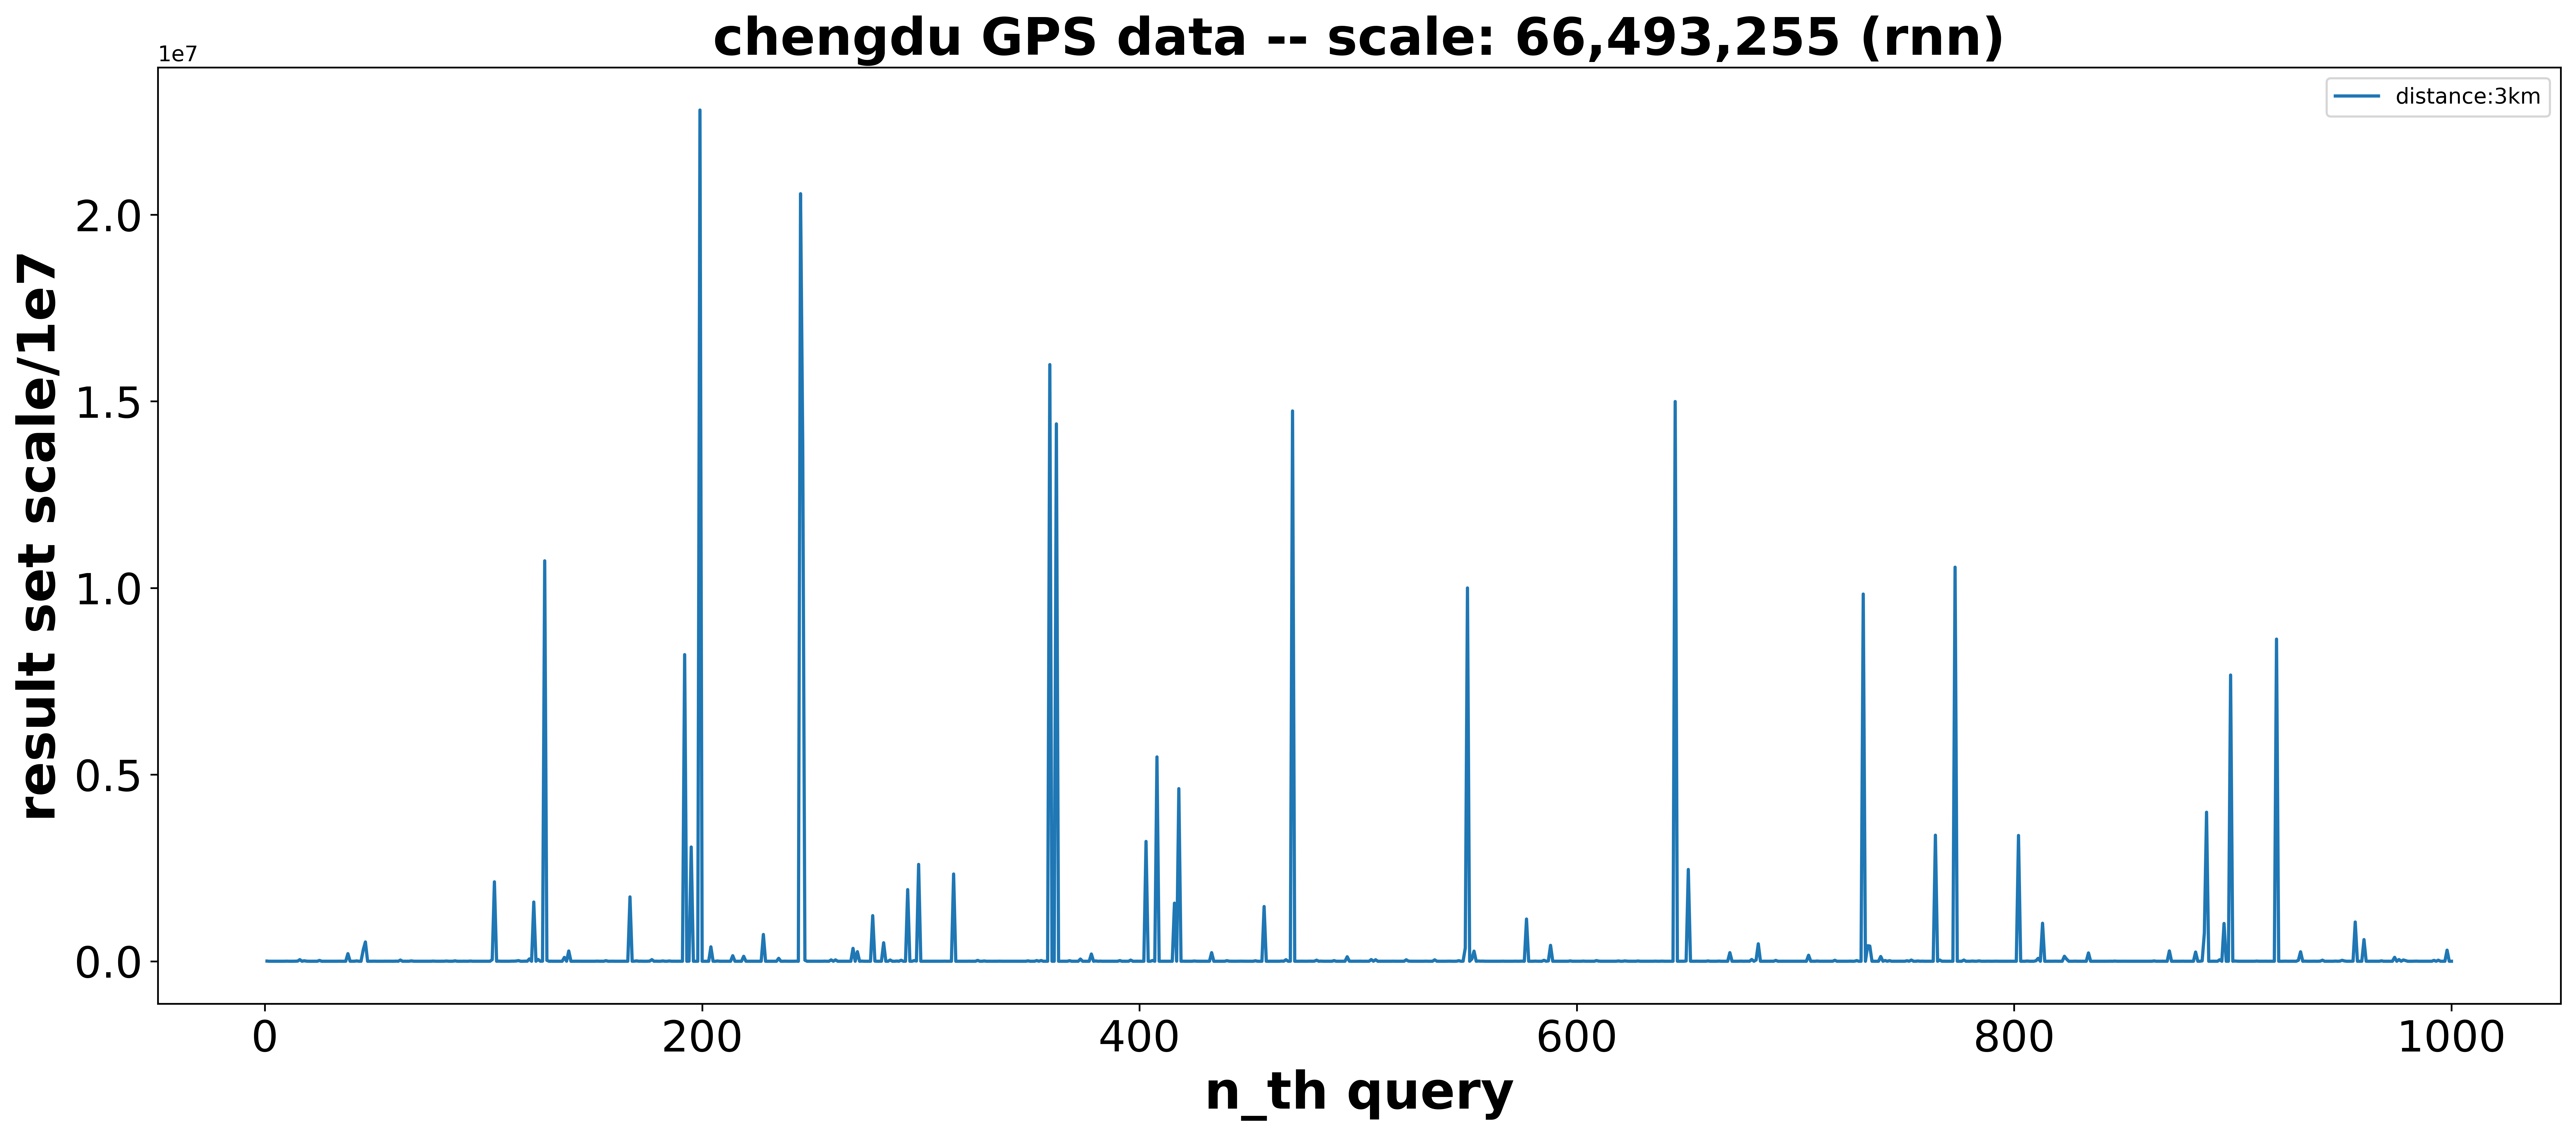

In [122]:
string = "4617 131 204 0 948 0 6 35 0 2009 0 0 238 1614 4106 43018 72 13002 3025 0 122 463 0 3 22301 0 0 4 0 70 134 308 0 1008 0 0 0 202577 872 377 974 8884 396 0 303768 515953 0 0 226 1554 8 16 3 5 874 419 966 70 9 2471 81 31829 0 166 0 153 10017 908 0 65 0 514 0 1 0 0 4186 216 43 0 595 80 6002 422 0 621 11090 0 0 0 1071 37 0 5427 86 0 0 252 92 19 0 0 131 44097 2127022 100 3072 0 0 24 87 0 3086 2353 7147 17129 0 0 2487 1010 61949 38 1586051 0 48145 1319 2455 10726519 23157 6 1013 0 3 765 0 0 102864 1898 274434 0 1 813 338 231 116 0 7 0 0 0 0 2786 199 416 57 15508 72 21 1344 0 0 0 166 0 167 0 1723380 0 1993 9337 249 2094 11 0 408 3845 43153 0 1713 0 131 8181 127 0 8154 48 923 0 756 329 21 8213415 0 3112 3059501 46 131 0 22802199 0 205 3 26 385599 215 0 6895 113 124 0 124 117 0 147286 551 0 357 61 132168 1233 0 0 449 0 0 0 0 716212 0 182 0 0 0 15 78161 297 151 1939 217 45 178 167 2094 0 20561118 13812398 27603 32 0 32 0 17 0 17 0 1973 0 41 35806 0 36516 0 179 0 3 0 0 0 344571 0 255904 0 3672 0 2 8 0 1221246 4357 107 24 1004 494715 0 0 32821 220 0 5417 0 26606 90 0 1919093 0 45 18422 5284 2593942 0 21 0 0 10 87 33 10 0 258 489 2045 56 917 165 2336533 0 0 0 96 179 0 919 0 6 0 22990 0 342 7392 9 0 0 321 11 211 2071 0 238 0 0 230 310 90 93 67 20 0 15 10765 5 0 0 18265 134 19370 0 0 150 15983081 826 127 14394507 164 0 0 0 0 14499 24 281 0 0 58398 20 3 56 0 193490 0 8492 2 2471 9 0 113 166 0 273 208 0 17974 128 15 14 120 30335 0 36 885 0 307 0 3209431 530 0 20014 60 5473188 131 206 9 0 71 0 134 1555917 2605 4623386 0 1382 17 0 0 0 6640 1717 262 0 0 0 0 190 229687 0 145 166 0 0 165 15755 2311 363 0 119 467 1818 1904 384 67 0 94 31 13122 0 0 47 1465550 0 21 16 0 10 0 0 4420 1727 40973 434 750 14740986 129 0 49 1151 216 0 473 2266 66 2431 28891 2 3493 1 65 0 0 0 16821 0 7 14 447 183 119836 1946 161 33 236 402 1548 0 8 0 52 44726 1226 40351 31 45 466 70 124 0 24 1318 9 0 0 19 97 38927 4562 318 119 17 238 23 169 0 1957 44 0 0 37782 1632 89 18 0 0 1520 1832 10 0 991 15316 0 1570 354176 9999438 0 60039 270354 0 6429 1690 3786 555 0 10 0 0 16 0 0 1944 90 0 0 0 0 1991 0 1134 3224 138 1130474 116 0 28 3204 189 0 0 25289 756 9042 425629 84 487 29 11 0 0 0 34 9058 0 294 119 79 134 4047 0 687 33 156 0 18176 3445 0 119 0 816 1111 7 86 0 8434 0 49 9296 2046 316 0 16 70 7145 0 0 0 0 0 0 91 2516 0 51 3133 0 0 320 12 203 14993658 119 116 61 492 7606 2458692 234 0 153 1318 7 56 16 51 8271 3 47 11 0 4008 0 0 0 0 229824 36 162 438 0 2694 22 390 1369 0 47154 9 33155 466455 154 11 14 5 175 886 0 23022 0 0 0 0 43 223 0 0 3 42 19 4 0 1 160413 18 988 3 5333 97 29 0 0 33 141 349 25884 0 237 122 84 14 0 2206 0 664 17761 155 211 9836079 0 415879 406798 364 11 17 131 126608 0 19703 3 15268 0 0 71 144 1119 27 8 13230 155 32257 17 87 6921 0 2524 0 39 15 59 0 3376490 9 31976 304 1005 0 28 479 0 10556011 94 119 0 31584 18 6 180 5209 0 1167 9671 34 0 0 1333 0 0 1180 1771 0 8 0 0 0 0 0 53 116 3369117 0 352 77 5420 89 76 0 13594 77694 50 1017482 10 0 0 0 473 1487 304 0 3 133405 56289 3 71 175 1983 13 38 0 0 0 222163 0 0 80 51 0 40 413 0 33 1467 0 4465 372 0 63 607 0 71 0 281 0 40 0 0 3 86 0 0 658 8537 211 0 75 742 0 0 276150 0 0 0 24 37 1357 17 0 0 0 35 246317 169 69 10030 754701 3991725 0 0 795 37 0 40023 70 1011613 0 607 7666784 59 6774 1461 37 0 19 73 44 4 48 59 4893 0 745 35 1156 0 700 11 0 8629678 0 0 0 2209 47 0 1184 117 445 26154 252607 10 2935 12 0 58 926 0 55 3012 28384 27 0 10 9 0 3841 0 3970 25786 8654 40 0 249 2862 1050521 0 0 0 579555 507 1 487 122 140 428 18 10670 10 202 0 0 69 104058 0 45072 274 34082 18218 69 164 0 1582 2909 0 75 323 0 21 0 415 23257 0 28585 50 56 402 296978 0 41"
temp = string.split(' ')
data = pd.DataFrame(temp).astype('int64')
data.columns = ['distance:3km']
data.index = [x for x in range(1, 1001)]
plt.figure(dpi=600, figsize=(20, 8))
plt.tick_params(labelsize=20)
plt.title('chengdu GPS data -- scale: 66,493,255 (rnn)',fontsize = 24, fontweight='heavy')
plt.xlabel('n_th query',fontsize = 24, fontweight='heavy')
plt.ylabel('result set scale/1e7',fontsize = 24, fontweight='heavy')
# plt.yticks(np.arange(0, 6, 0.5))
sns.lineplot(data=data)
plt.show()

# shenzhen

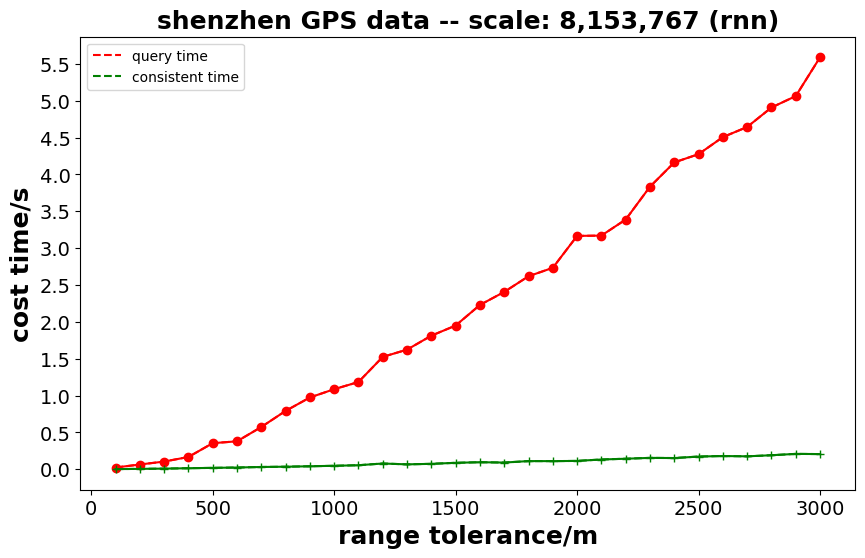

In [97]:
string1 = "24.941 65.731 105.561 167.832 354.964 380.333 574.264 792.240 974.793 1087.117 1184.579 1525.350 1623.588 1812.873 1950.362 2229.684 2406.378 2618.914 2733.438 3166.123 3170.287 3388.077 3833.536 4162.772 4274.773 4506.157 4643.273 4907.663 5062.249 5588.200"
string2 = "3.060000 6.678000 9.937000 15.390000 20.153000 24.779000 32.215000 35.892000 41.819000 48.315000 56.005000 79.301000 67.697000 74.917000 88.630000 96.771000 92.197000 112.132000 111.454000 114.597000 133.664000 144.078000 155.740000 153.294000 173.497000 180.987000 176.522000 191.672000 209.799000 207.136000"
y1, y2 = [], []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item) / 1000.0)
temp = string2.split(' ')
for item in temp:
    if len(item) > 1:
        y2.append(float(item) / 1000.0)
x=np.arange(100,3100, 100)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=14)
l1=plt.plot(x,y1,'r--',label='query time')
l2=plt.plot(x,y2,'g--',label='consistent time')
plt.plot(x,y1,'ro-',x,y2,'g+-')
plt.title('shenzhen GPS data -- scale: 8,153,767 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
plt.ylabel('cost time/s',fontsize = 18, fontweight='heavy')
plt.yticks(np.arange(0, 6, 0.5))
plt.legend()
plt.show()

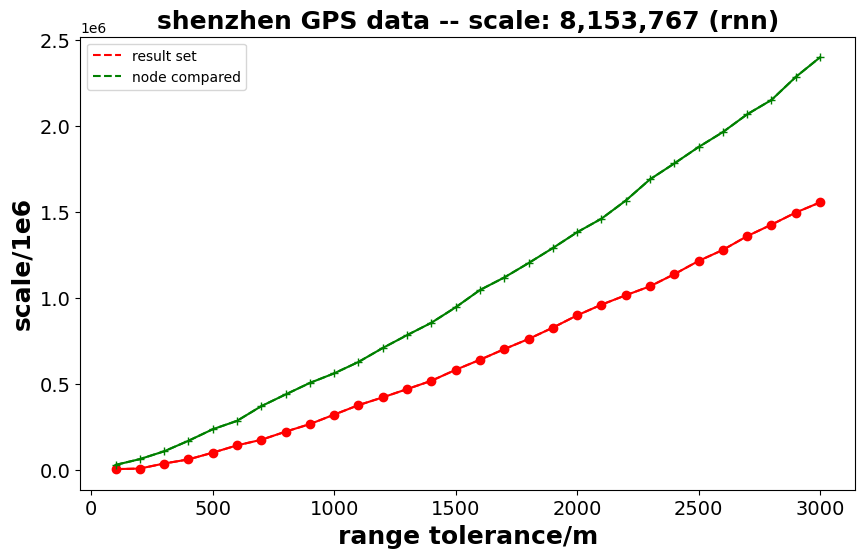

In [128]:
string1 = "3484 6760 36167 59937 99224 141673 174216 221495 265489 320657 375726 421003 469027 517412 581306 639738 701694 760591 826621 898134 960195 1015000 1067281 1137760 1214699 1278936 1359266 1425897 1496381 1555538"
string2 = "27970 61609 107114 168289 235409 284313 369732 438018 505052 560803 626993 708306 783055 855024 944954 1045663 1118389 1202251 1289756 1381748 1460466 1565894 1689646 1781974 1877572 1964515 2068118 2151541 2285278 2399662"
y1, y2 = [], []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item))
temp = string2.split(' ')
for item in temp:
    if len(item) > 1:
        y2.append(float(item))
x=np.arange(100,3100, 100)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=14)
l1=plt.plot(x,y1,'r--',label='result set')
l2=plt.plot(x,y2,'g--',label='node compared')
plt.plot(x,y1,'ro-',x,y2,'g+-')
plt.title('shenzhen GPS data -- scale: 8,153,767 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
plt.ylabel('scale/1e6',fontsize = 18, fontweight='heavy')
plt.legend()
plt.show()

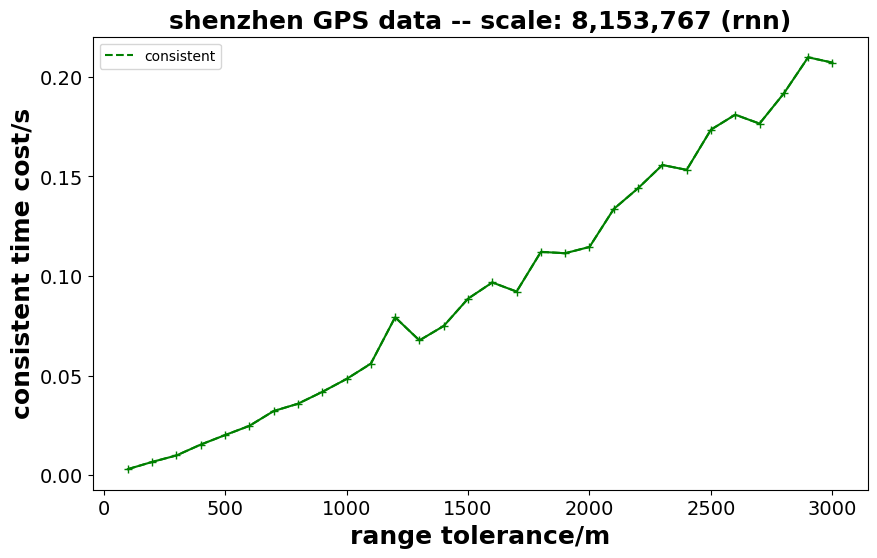

In [94]:
string1 = "3.060000 6.678000 9.937000 15.390000 20.153000 24.779000 32.215000 35.892000 41.819000 48.315000 56.005000 79.301000 67.697000 74.917000 88.630000 96.771000 92.197000 112.132000 111.454000 114.597000 133.664000 144.078000 155.740000 153.294000 173.497000 180.987000 176.522000 191.672000 209.799000 207.136000"
y1= []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item) / 1000.0)
x=np.arange(100,3100, 100)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=14)
l1=plt.plot(x,y1,'g--',label='consistent')
plt.plot(x,y1,'g+-')
plt.title('shenzhen GPS data -- scale: 8,153,767 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
plt.ylabel('consistent time cost/s',fontsize = 18, fontweight='heavy')
# plt.yticks(np.arange(0, 6, 0.5))
plt.legend()
plt.show()

# porto

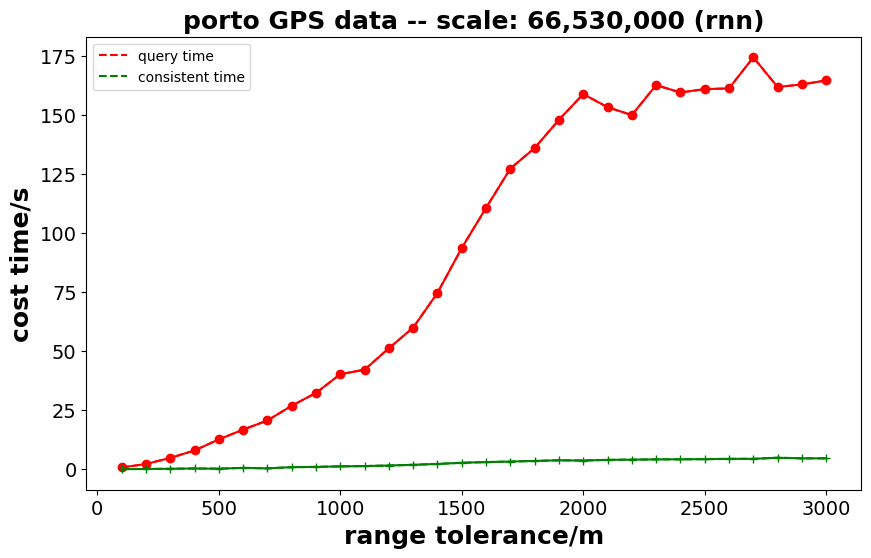

In [115]:
string1 = "764.431 2235.856 4810.839 7978.575 12651.304 16790.679 20672.387 26906.627 32331.670 40260.020 42180.362 51245.623 59994.911 74672.985 93702.938 110675.554 127323.196 136035.824 147967.324 158889.803 153330.061 149980.359 162658.421 159558.342 160968.339 161259.131 174440.709 161865.156 162957.029 164652.780"
string2 = "73.651000 134.272000 228.889000 344.947000 258.360000 613.361000 393.190000 901.539000 1020.881000 1246.069000 1364.827000 1608.546000 1904.206000 2280.427000 2766.287000 3053.139000 3284.101000 3538.107000 3821.163000 3710.829000 3991.405000 4089.535000 4203.708000 4236.310000 4295.615000 4424.472000 4433.473000 4895.791000 4646.540000 4640.934000"
y1, y2 = [], []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item) / 1000.0)
temp = string2.split(' ')
for item in temp:
    if len(item) > 1:
        y2.append(float(item) / 1000.0)
x=np.arange(100,3100, 100)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=14)
l1=plt.plot(x,y1,'r--',label='query time')
l2=plt.plot(x,y2,'g--',label='consistent time')
plt.plot(x,y1,'ro-',x,y2,'g+-')
plt.title('porto GPS data -- scale: 66,530,000 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
plt.ylabel('cost time/s',fontsize = 18, fontweight='heavy')
# plt.yticks(np.arange(0, 6, 0.5))
plt.legend()
plt.show()

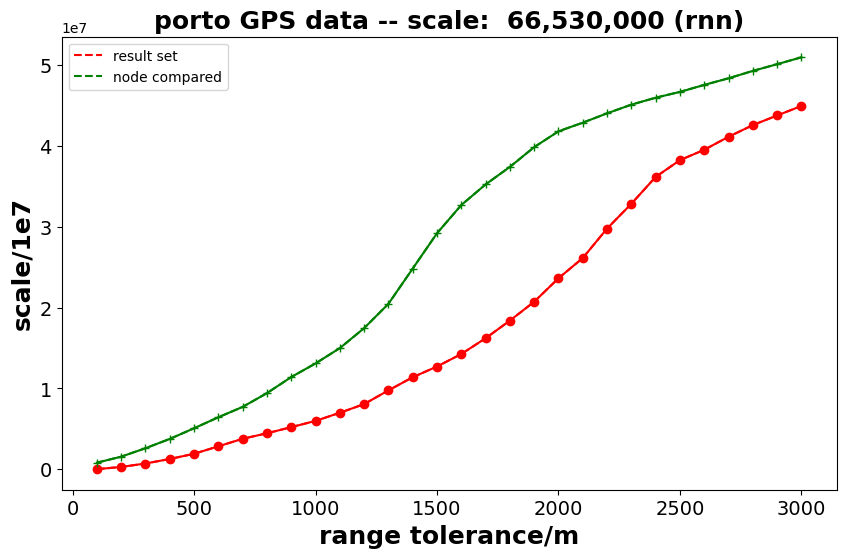

In [130]:
string1 = "21687 290331 716962 1274188 1918146 2841429 3773264 4452837 5210258 5983693 6987854 8058424 9756841 11381963 12706567 14251844 16201634 18382457 20712720 23617207 26119407 29758924 32824214 36144362 38218496 39499742 41107690 42549917 43742438 44914417"
string2 = "816524 1563010 2604423 3757222 5071848 6435310 7712750 9415100 11402831 13089553 14979728 17450877 20455599 24814222 29180770 32667627 35218513 37385430 39827917 41783547 42849906 44006184 45078895 45937208 46656426 47520284 48337081 49251801 50080074 50930958"
y1, y2 = [], []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item))
temp = string2.split(' ')
for item in temp:
    if len(item) > 1:
        y2.append(float(item))
x=np.arange(100,3100, 100)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=14)
l1=plt.plot(x,y1,'r--',label='result set')
l2=plt.plot(x,y2,'g--',label='node compared')
plt.plot(x,y1,'ro-',x,y2,'g+-')
plt.title('porto GPS data -- scale:  66,530,000 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
plt.ylabel('scale/1e7',fontsize = 18, fontweight='heavy')
plt.legend()
plt.show()

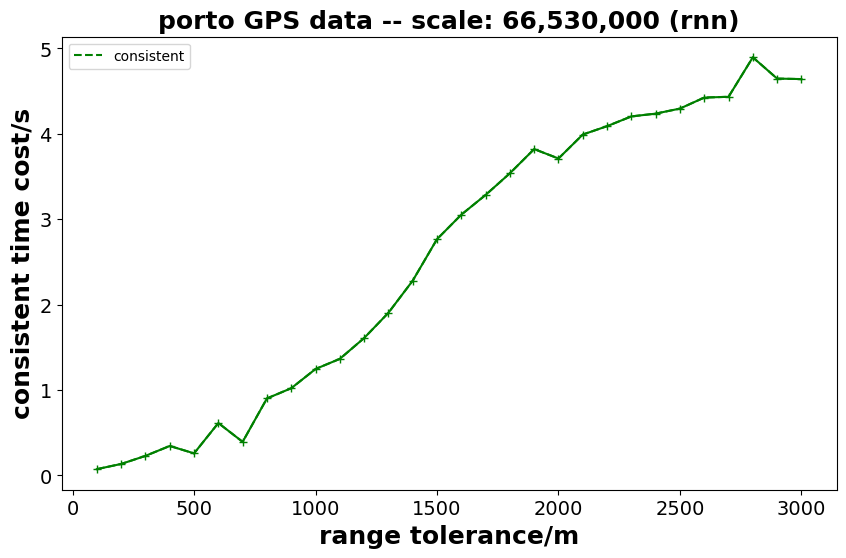

In [117]:
string1 = "73.651000 134.272000 228.889000 344.947000 258.360000 613.361000 393.190000 901.539000 1020.881000 1246.069000 1364.827000 1608.546000 1904.206000 2280.427000 2766.287000 3053.139000 3284.101000 3538.107000 3821.163000 3710.829000 3991.405000 4089.535000 4203.708000 4236.310000 4295.615000 4424.472000 4433.473000 4895.791000 4646.540000 4640.934000"
y1= []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item) / 1000.0)
x=np.arange(100,3100, 100)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=14)
l1=plt.plot(x,y1,'g--',label='consistent')
plt.plot(x,y1,'g+-')
plt.title('porto GPS data -- scale: 66,530,000 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
plt.ylabel('consistent time cost/s',fontsize = 18, fontweight='heavy')
# plt.yticks(np.arange(0, 6, 0.5))
plt.legend()
plt.show()

# chengdu

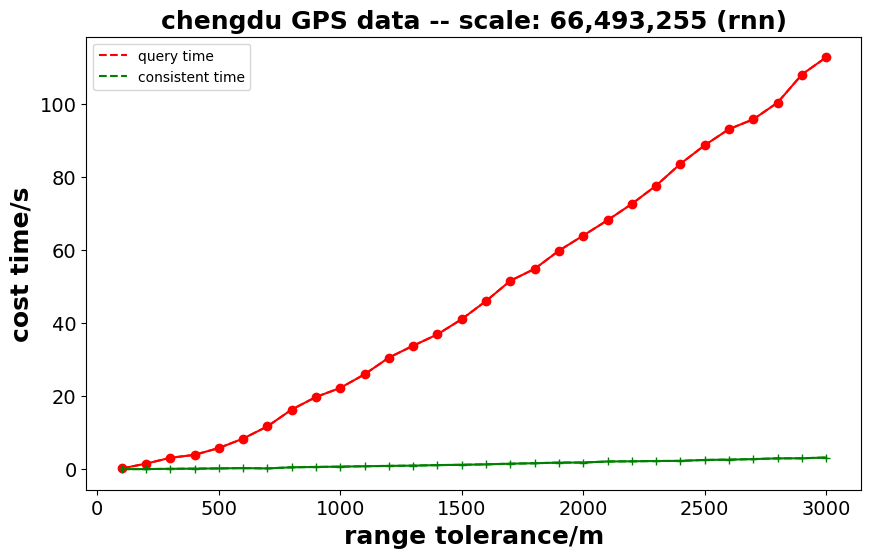

In [123]:
string1 = "197.918 1516.893 3114.128 3929.250 5792.331 8369.175 11712.052 16324.694 19763.452 22248.383 25966.482 30535.761 33796.207 36905.166 41062.254 46031.286 51569.974 54827.666 59807.273 63947.726 68133.785 72610.178 77614.905 83576.598 88666.102 93078.933 95760.551 100331.110 108015.695 112731.256"
string2 = "19.804000 35.846000 105.192000 150.839000 210.951000 306.248000 213.753000 520.567000 616.420000 695.871000 810.991000 907.214000 978.826000 1123.977000 1204.548000 1332.281000 1508.925000 1639.203000 1802.131000 1828.091000 2108.917000 2162.240000 2240.144000 2279.511000 2533.826000 2617.193000 2765.377000 2967.237000 2989.953000 3197.746000"
y1, y2 = [], []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item) / 1000.0)
temp = string2.split(' ')
for item in temp:
    if len(item) > 1:
        y2.append(float(item) / 1000.0)
x=np.arange(100,3100, 100)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=14)
l1=plt.plot(x,y1,'r--',label='query time')
l2=plt.plot(x,y2,'g--',label='consistent time')
plt.plot(x,y1,'ro-',x,y2,'g+-')
plt.title('chengdu GPS data -- scale: 66,493,255 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
plt.ylabel('cost time/s',fontsize = 18, fontweight='heavy')
# plt.yticks(np.arange(0, 6, 0.5))
plt.legend()
plt.show()

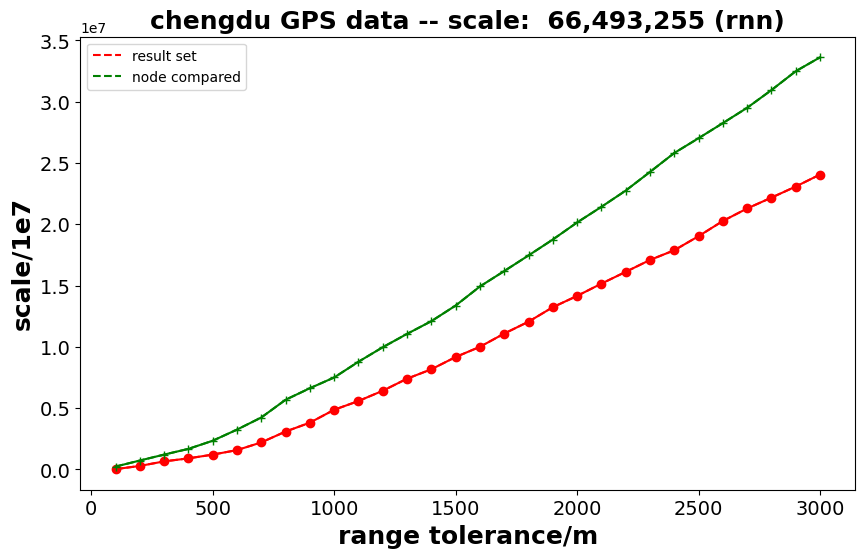

In [131]:
string1 = "22206 281522 654457 900739 1206595 1574199 2201992 3087353 3812822 4864707 5579196 6416946 7400347 8168304 9169127 10002276 11083186 12051350 13234002 14154356 15157657 16116660 17089265 17880233 19029614 20269830 21290304 22175766 23079742 24060164"
string2 = "229907 723530 1208088 1673720 2338538 3246250 4234710 5680646 6623650 7500337 8784046 9967849 11056448 12094150 13369062 14925364 16182567 17458054 18754943 20147645 21422759 22746737 24271703 25816502 27023875 28255362 29506542 30951213 32489853 33623637"
y1, y2 = [], []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item))
temp = string2.split(' ')
for item in temp:
    if len(item) > 1:
        y2.append(float(item))
x=np.arange(100,3100, 100)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=14)
l1=plt.plot(x,y1,'r--',label='result set')
l2=plt.plot(x,y2,'g--',label='node compared')
plt.plot(x,y1,'ro-',x,y2,'g+-')
plt.title('chengdu GPS data -- scale:  66,493,255 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
plt.ylabel('scale/1e7',fontsize = 18, fontweight='heavy')
plt.legend()
plt.show()

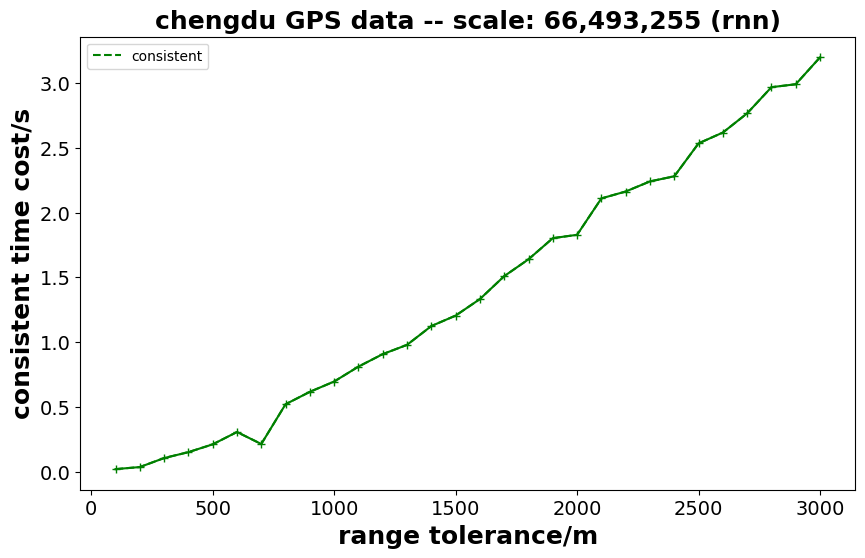

In [126]:
string1 = "19.804000 35.846000 105.192000 150.839000 210.951000 306.248000 213.753000 520.567000 616.420000 695.871000 810.991000 907.214000 978.826000 1123.977000 1204.548000 1332.281000 1508.925000 1639.203000 1802.131000 1828.091000 2108.917000 2162.240000 2240.144000 2279.511000 2533.826000 2617.193000 2765.377000 2967.237000 2989.953000 3197.746000"
y1= []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item) / 1000.0)
x=np.arange(100,3100, 100)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=14)
l1=plt.plot(x,y1,'g--',label='consistent')
plt.plot(x,y1,'g+-')
plt.title('chengdu GPS data -- scale: 66,493,255 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
plt.ylabel('consistent time cost/s',fontsize = 18, fontweight='heavy')
# plt.yticks(np.arange(0, 6, 0.5))
plt.legend()
plt.show()

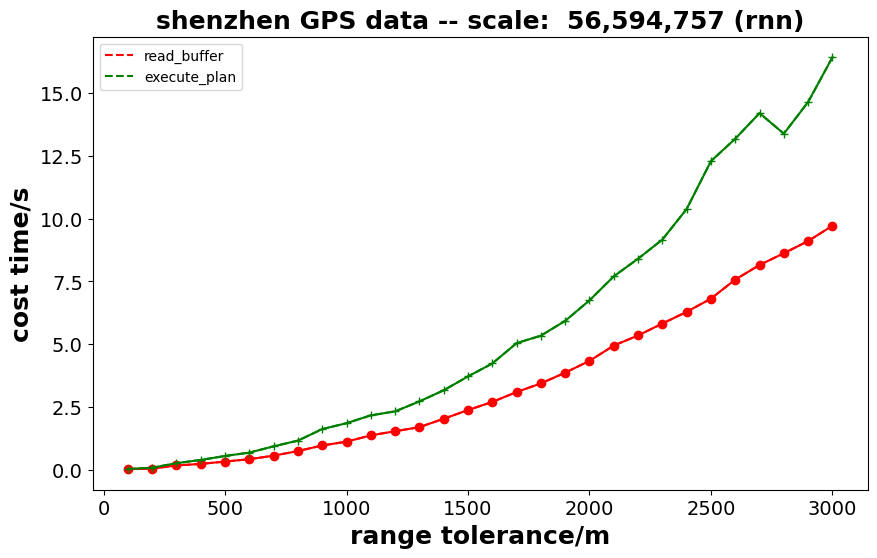

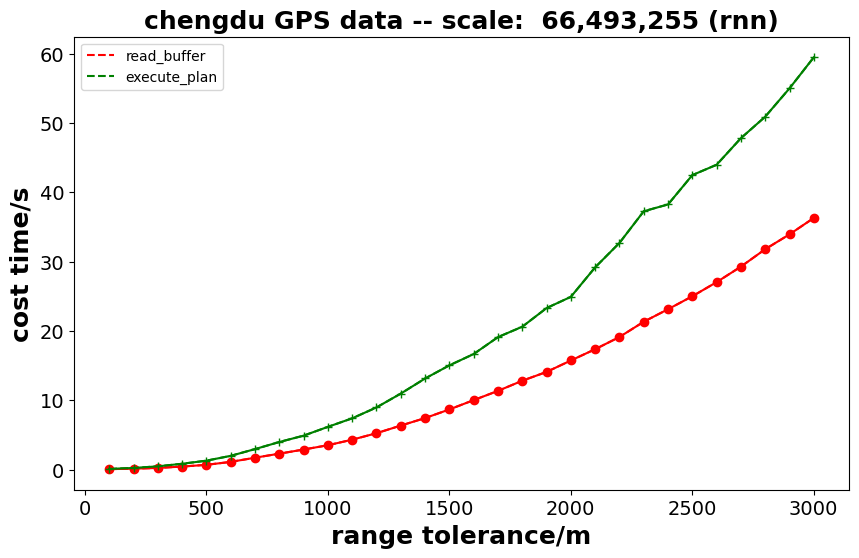

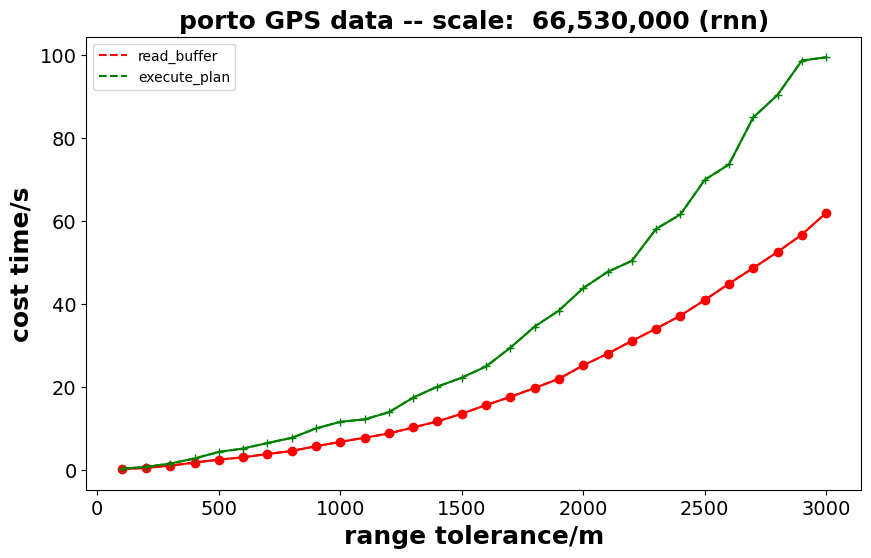

In [6]:
debris = []
condense = []
with open(r"E:\DBGroup\rbinselect.log", "r") as f:
    for raw in f.readlines():
        debris = raw.split(',')
for i in range(180):
    left = i * 10
    right = left + 10
    temp = 0
    for j in range(left, right):
        temp = temp + float(debris[j])
    condense.append(temp / 10000.0)
names = ['shenzhen', 'chengdu', 'porto']
scales = ['56,594,757', '66,493,255', '66,530,000']
for i in range(3):
    rb = condense[i * 30 : (i + 1) * 30]
    tt = condense[i * 30 + 90 : (i + 1) * 30 + 90]
    x=np.arange(100,3100, 100)
    plt.figure(dpi=100, figsize=(10, 6))
    plt.tick_params(labelsize=14)
    l1=plt.plot(x,rb,'r--',label='read_buffer')
    l2=plt.plot(x,tt,'g--',label='execute_plan')
    plt.plot(x,rb,'ro-',x,tt,'g+-')
    plt.title('{} GPS data -- scale:  {} (rnn)'.format(names[i], scales[i]),fontsize = 18, fontweight='heavy')
    plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
    plt.ylabel('cost time/s',fontsize = 18, fontweight='heavy')
    plt.legend()
    plt.savefig("E:/DBGroup/imgs/read_buffer_{}".format(names[i]), bbox_inches='tight')
    plt.show()

In [25]:
condense[90 + 28]

14.645420999999997

In [1]:
debris = []
condense = []
with open(r"E:\DBGroup\rbinselect_1.log", "r") as f:
    for raw in f.readlines():
        debris = raw.split(',')
for i in range(60):
    left = i * 10
    right = left + 10
    temp = 0
    for j in range(left, right):
        temp = temp + float(debris[j])
    condense.append(temp / 10000.0)
tt = condense[0 : 30]
rb = condense[30 : 60]
x=np.arange(100,3100, 100)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=14)
l1=plt.plot(x,rb,'r--',label='read_buffer')
l2=plt.plot(x,tt,'g--',label='execute_plan')
plt.plot(x,rb,'ro-',x,tt,'g+-')
plt.title('shenzhen GPS data -- scale: 56,594,757 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
plt.ylabel('cost time/s',fontsize = 18, fontweight='heavy')
plt.legend()
plt.savefig("E:/DBGroup/imgs/read_buffer_shenzhen", bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\DBGroup\\rbinselect_1.log'

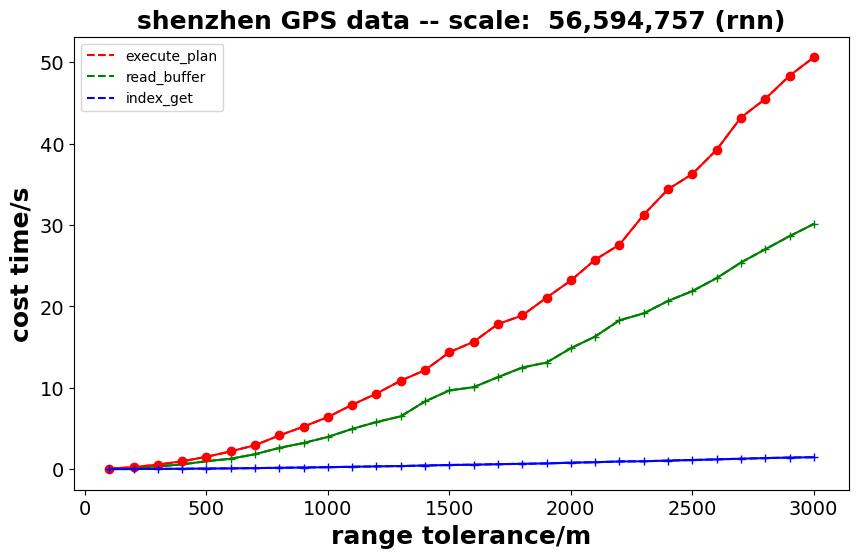

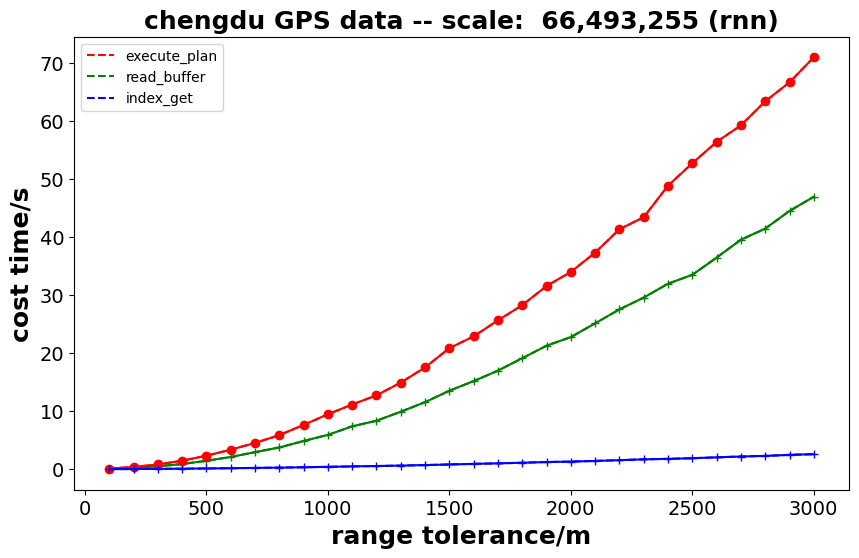

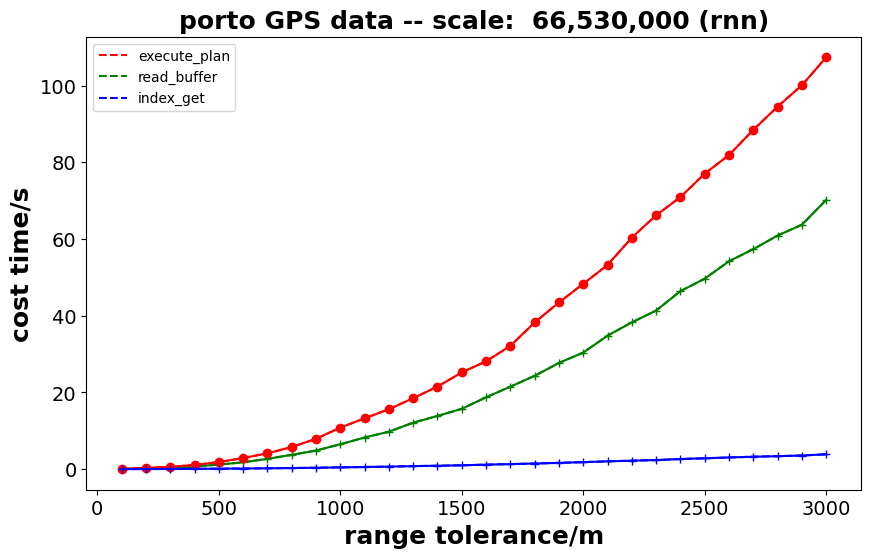

In [8]:
debris = []
condense = []

with open(r"D:\zlrj_Resources\select.log", "r") as f:
    for raw in f.readlines():
        debris = raw.split(',')
for i in range(30+30+10):
    left = i * 100
    right = left + 20
    temp = 0
    for j in range(left, right):
        temp = temp + float(debris[j])
    condense.append(temp / 20000.0)
with open(r"D:\zlrj_Resources\new\select.log", "r") as f:
    for raw in f.readlines():
        debris = raw.split(',')
for i in range(20):
    left = i * 20
    right = left + 20
    temp = 0
    for j in range(left, right):
        temp = temp + float(debris[j])
    condense.append(temp / 20000.0)
sz_total = condense[0:30]
cd_total = condense[30:60]
porto_total = condense[60:90]
total = [sz_total, cd_total, porto_total]

condense = []
with open(r"D:\zlrj_Resources\new\rbinselect.log", "r") as f:
    for raw in f.readlines():
        debris = raw.split(',')
for i in range(90):
    left = i * 20
    right = left + 20
    temp = 0
    for j in range(left, right):
        temp = temp + float(debris[j])
    condense.append(temp / 20000.0)
sz_rb = condense[0:30]
cd_rb = condense[30:60]
porto_rb = condense[60:90]
rb = [sz_rb, cd_rb, porto_rb]

condense = []
with open(r"D:\zlrj_Resources\new\tidinselect.log", "r") as f:
    for raw in f.readlines():
        debris = raw.split(',')
for i in range(90):
    left = i * 20
    right = left + 20
    temp = 0
    for j in range(left, right):
        temp = temp + float(debris[j])
    condense.append(temp / 20000.0)
sz_tid = condense[0:30]
cd_tid = condense[30:60]
porto_tid = condense[60:90]
tid = [sz_tid, cd_tid, porto_tid]

names = ['shenzhen', 'chengdu', 'porto']
scales = ['56,594,757', '66,493,255', '66,530,000']
for i in range(3):
    x=np.arange(100,3100, 100)
    plt.figure(dpi=100, figsize=(10, 6))
    plt.tick_params(labelsize=14)
    l1=plt.plot(x,total[i],'r--',label='execute_plan')
    l2=plt.plot(x,rb[i],'g--',label='read_buffer')
    l3=plt.plot(x,tid[i],'b--',label='index_get')
    plt.plot(x,rb[i],'g+-',x,total[i],'ro-', x, tid[i], 'b+-')
    plt.title('{} GPS data -- scale:  {} (rnn)'.format(names[i], scales[i]),fontsize = 18, fontweight='heavy')
    plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
    plt.ylabel('cost time/s',fontsize = 18, fontweight='heavy')
    plt.legend()
    plt.savefig(r"D:\zlrj_Resources\DBGroup\imgs\{}_gis".format(names[i]), bbox_inches='tight')
    plt.show()

In [27]:
# sentences = []
# with open(r"D:\zlrj_Resources\DBGroup\logs\run.log", "r") as f:
#     for raw in f.readlines():
#         sentences.append(raw)
# sentences.sort()
# with open(r"D:\zlrj_Resources\DBGroup\run.log", "w") as f:
#     for line in sentences:
#         f.write(line)

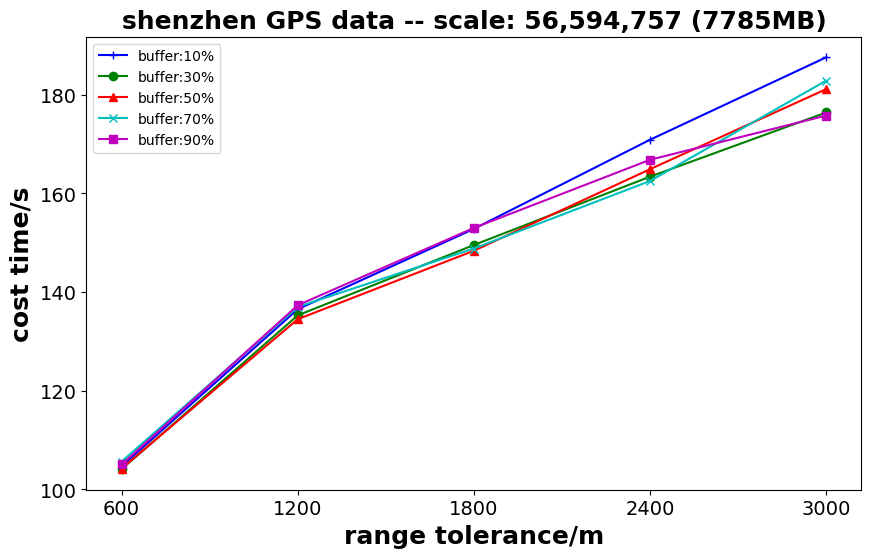

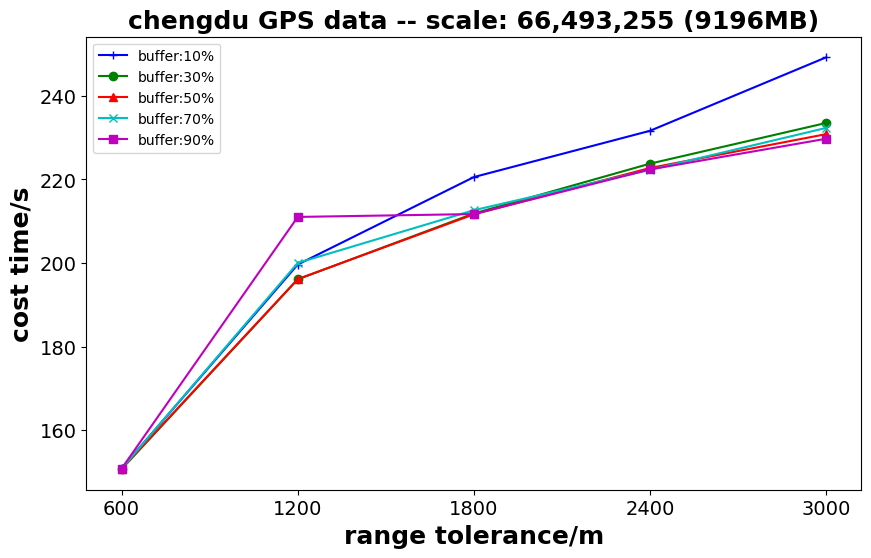

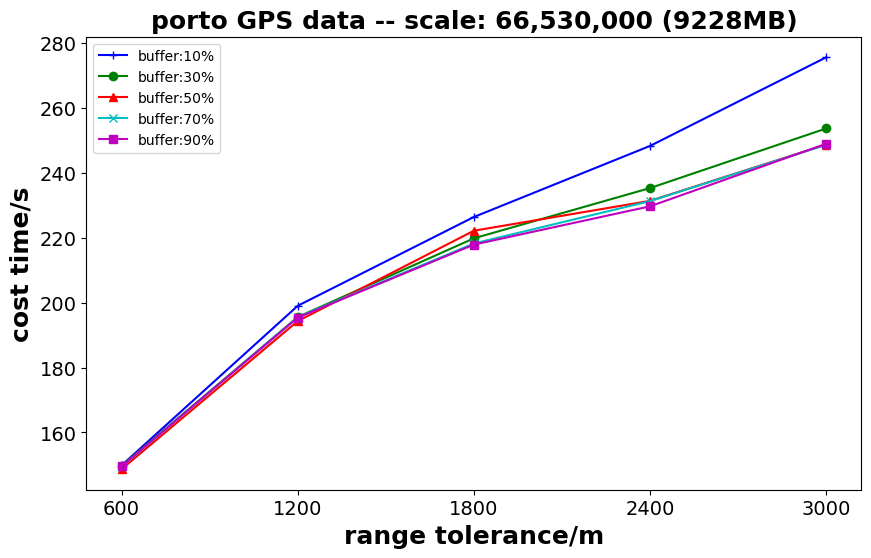

In [33]:
debris = []
condense = []

with open(r"D:\zlrj_Resources\DBGroup\logs\buffer_new\buf_select.log", "r") as f:
    for raw in f.readlines():
        debris = raw.split(',')
for i in range(75):
    left = i * 20
    right = left + 20
    temp = 0
    for j in range(left, right):
        temp = temp + float(debris[j])
    condense.append(temp / 20000.0)
sz = condense[0:25]
cd = condense[25:50]
porto = condense[50:75]

ss = [sz, cd, porto]
names = ['shenzhen', 'chengdu', 'porto']
scales = ['56,594,757 (7785MB)', '66,493,255 (9196MB)', '66,530,000 (9228MB)']
for i in range(3):
    x=np.arange(600,3100, 600)
    plt.figure(dpi=100, figsize=(10, 6))
    plt.tick_params(labelsize=14)
    l1=plt.plot(x,ss[i][0:5],'b+-',label='buffer:10%')
    l2=plt.plot(x,ss[i][5:10],'go-',label='buffer:30%')
    l3=plt.plot(x,ss[i][10:15],'r^-',label='buffer:50%')
    l4=plt.plot(x,ss[i][15:20],'cx-',label='buffer:70%')
    l5=plt.plot(x,ss[i][20:25],'ms-',label='buffer:90%')
    plt.title('{} GPS data -- scale: {}'.format(names[i], scales[i]),fontsize = 18, fontweight='heavy')
    plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
    plt.ylabel('cost time/s',fontsize = 18, fontweight='heavy')
    plt.xticks(np.arange(600,3100, 600))
    plt.legend()
    plt.savefig(r"D:\zlrj_Resources\DBGroup\imgs\{}_buffer".format(names[i]), bbox_inches='tight')
    plt.show()

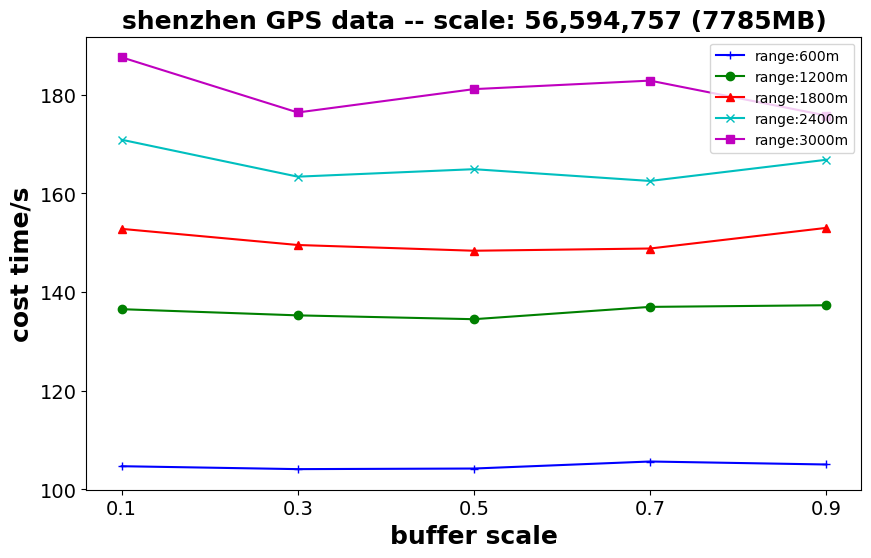

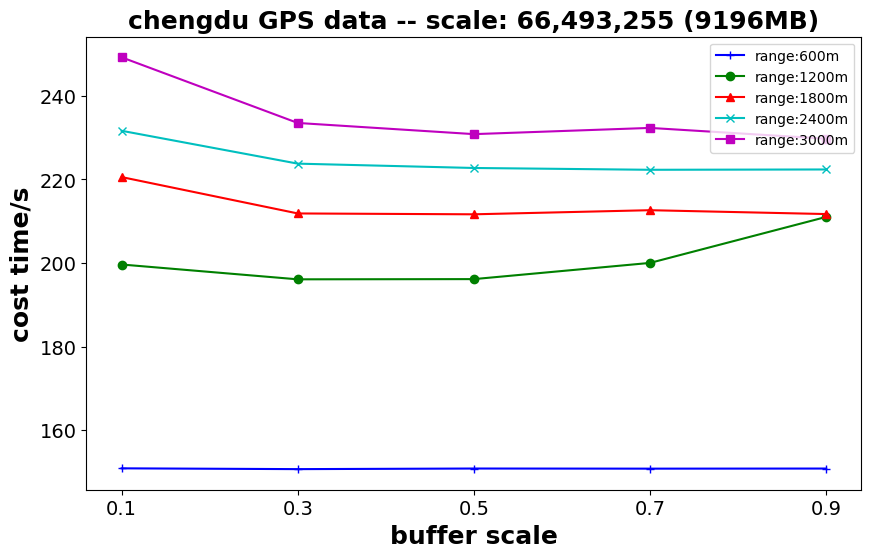

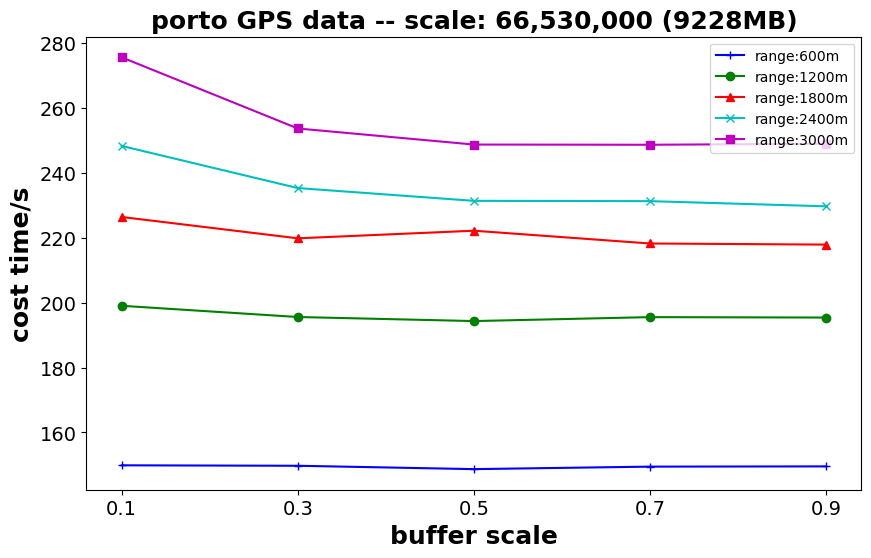

In [34]:
debris = []
condense = []

with open(r"D:\zlrj_Resources\DBGroup\logs\buffer_new\buf_select.log", "r") as f:
    for raw in f.readlines():
        debris = raw.split(',')
for i in range(75):
    left = i * 20
    right = left + 20
    temp = 0
    for j in range(left, right):
        temp = temp + float(debris[j])
    condense.append(temp / 20000.0)
sz = condense[0:25]
cd = condense[25:50]
porto = condense[50:75]

ss = [sz, cd, porto]
names = ['shenzhen', 'chengdu', 'porto']
scales = ['56,594,757 (7785MB)', '66,493,255 (9196MB)', '66,530,000 (9228MB)']
for i in range(3):
    temp = ss[i]
    temp = np.array(temp)
    temp = temp.reshape((int(len(temp)/5), 5))
    st = [[], [], [], [], []]
    for ele in temp:
        for j in range(0, len(ele)):
            st[j].append(ele[j])
    x=np.arange(0.1, 1, 0.2)
    plt.figure(dpi=100, figsize=(10, 6))
    plt.tick_params(labelsize=14)
    l1=plt.plot(x,st[0],'b+-',label='range:600m')
    l2=plt.plot(x,st[1],'go-',label='range:1200m')
    l3=plt.plot(x,st[2],'r^-',label='range:1800m')
    l4=plt.plot(x,st[3],'cx-',label='range:2400m')
    l5=plt.plot(x,st[4],'ms-',label='range:3000m')
    plt.title('{} GPS data -- scale: {}'.format(names[i], scales[i]),fontsize = 18, fontweight='heavy')
    plt.xlabel('buffer scale',fontsize = 18, fontweight='heavy')
    plt.ylabel('cost time/s',fontsize = 18, fontweight='heavy')
    plt.xticks(x)
    plt.legend()
    plt.savefig(r"D:\zlrj_Resources\DBGroup\imgs\{}_buffer_2".format(names[i]), bbox_inches='tight')
    plt.show()

In [56]:
temp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
temp[1::2]

[2, 4, 6, 8, 10]

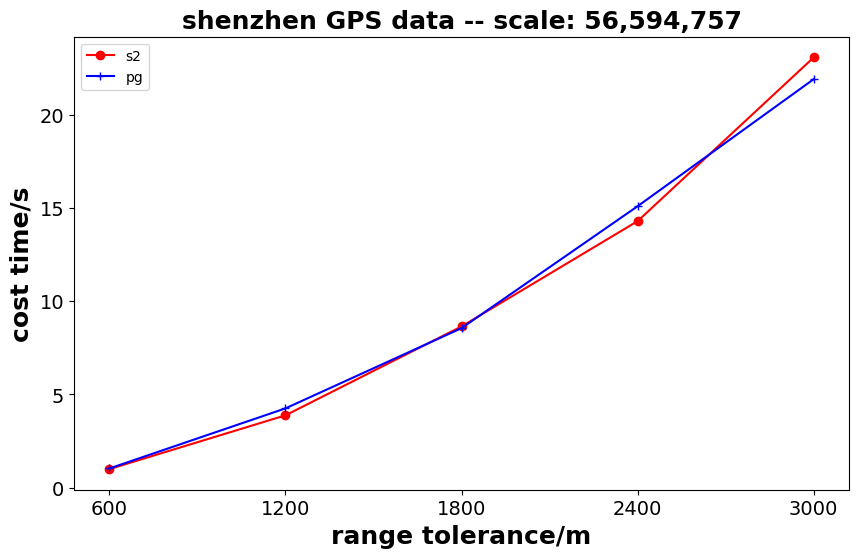

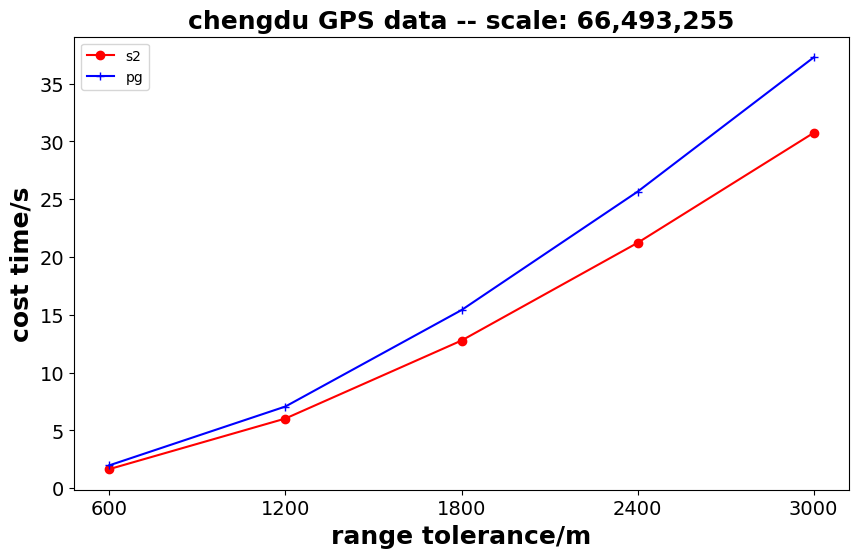

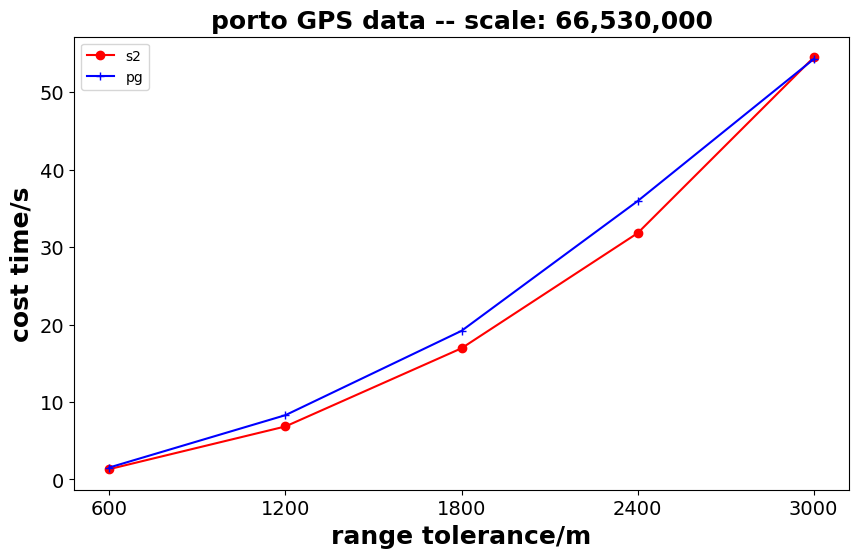

In [2]:
s2 = []
pg = []

condense = []
with open(r"D:\zlrj_Resources\DBGroup\logs\s2_new\s2_time.log", "r") as f:
    for raw in f.readlines():
        debris = raw.split(',')
for i in range(15):
    left = i * 20
    right = left + 20
    temp = 0
    for j in range(left, right):
        temp = temp + float(debris[j])
    condense.append(temp / 20.0)
s2.append(condense[0:5])

condense = []
with open(r"D:\zlrj_Resources\DBGroup\logs\s2_new\s2_time_new.log", "r") as f:
    for raw in f.readlines():
        debris = raw.split(',')
for i in range(10):
    left = i * 20
    right = left + 20
    temp = 0
    for j in range(left, right):
        temp = temp + float(debris[j])
    condense.append(temp / 20.0)
s2.append(condense[0:5])
s2.append(condense[5:10])

condense = []
with open(r"D:\zlrj_Resources\DBGroup\logs\buffer_new\new\buf_select.log", "r") as f:
    for raw in f.readlines():
        debris = raw.split(',')
debris = debris[1::2]
for i in range(15):
    left = i * 20
    right = left + 20
    temp = 0
    for j in range(left, right):
        temp = temp + float(debris[j])
    condense.append(temp / 20000.0)
pg.append(condense[0:5])
pg.append(condense[5:10])
pg.append(condense[10:15])

names = ['shenzhen', 'chengdu', 'porto']
scales = ['56,594,757', '66,493,255', '66,530,000']
for i in range(3):
    x=np.arange(600,3100, 600)
    plt.figure(dpi=100, figsize=(10, 6))
    plt.tick_params(labelsize=14)
    l1=plt.plot(x,s2[i],'ro-',label='s2')
    l2=plt.plot(x,pg[i],'b+-',label='pg')
    plt.title('{} GPS data -- scale: {}'.format(names[i], scales[i]),fontsize = 18, fontweight='heavy')
    plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
    plt.ylabel('cost time/s',fontsize = 18, fontweight='heavy')
    plt.xticks(np.arange(600,3100, 600))
    plt.legend()
    plt.savefig(r"D:\zlrj_Resources\DBGroup\imgs\{}_timeComparison".format(names[i]), bbox_inches='tight')
    plt.show()

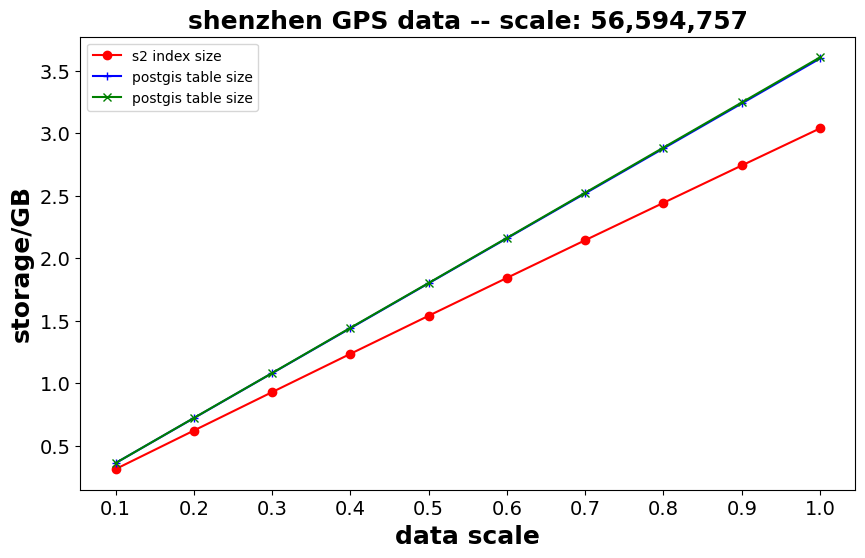

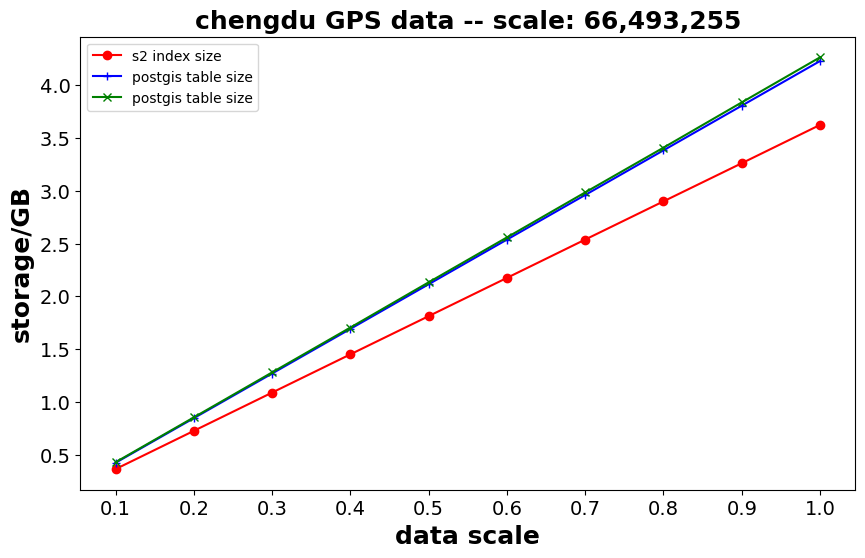

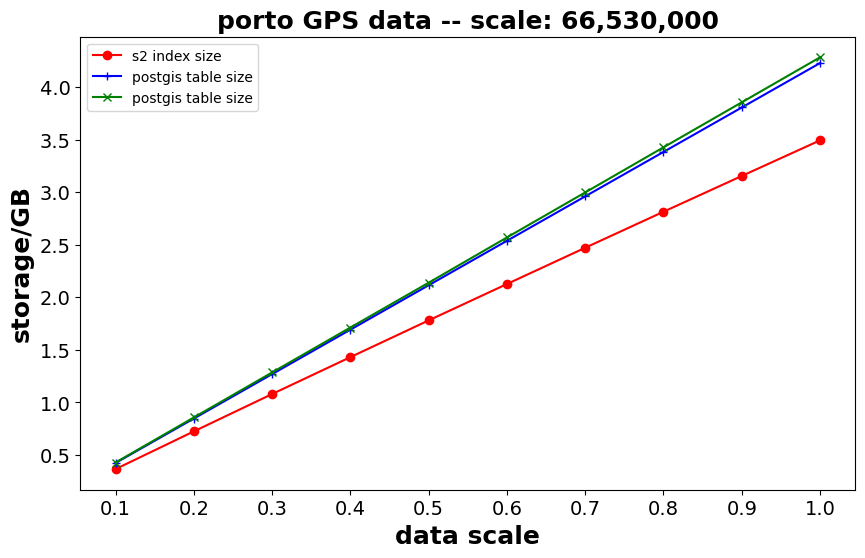

In [4]:
s2 = []
with open(r"D:\zlrj_Resources\DBGroup\logs\s2_mem\partial_mem.log", "r") as f:
    for raw in f.readlines():
        debris = raw.split(',')
for num in range(len(debris)):
    debris[num] = float(debris[num]) / (1024 * 1024)
s2.append(debris[0:10])
s2.append(debris[10:20])
s2.append(debris[20:30])

sz_data, cd_data, porto_data = [], [], []
sz_index, cd_index, porto_index = [], [], []
with open(r"D:\zlrj_Resources\DBGroup\logs\gist_build\data_space.log", "r") as f:
    for raw in f.readlines():
        debris = raw.split('-')
        if debris[0] == 'sz':
            sz_data.append(float(debris[1]) / (1024 * 1024 * 1024))
            sz_index.append(float(debris[2]) / (1024 * 1024 * 1024))
        elif debris[0] == 'cd':
            cd_data.append(float(debris[1]) / (1024 * 1024 * 1024))
            cd_index.append(float(debris[2]) / (1024 * 1024 * 1024))
        elif debris[0] == 'porto':
            porto_data.append(float(debris[1]) / (1024 * 1024 * 1024))
            porto_index.append(float(debris[2]) / (1024 * 1024 * 1024))
gis_data = [sz_data, cd_data, porto_data]
gis_index = [sz_index, cd_index, porto_index]

names = ['shenzhen', 'chengdu', 'porto']
scales = ['56,594,757', '66,493,255', '66,530,000']
for i in range(3):
    x=np.arange(0.1,1.1, 0.1)
    plt.figure(dpi=100, figsize=(10, 6))
    plt.tick_params(labelsize=14)
    l1=plt.plot(x, s2[i],'ro-',label='s2 index size')
    l2=plt.plot(x, gis_data[i],'b+-',label='postgis table size')
    l3=plt.plot(x, gis_index[i],'gx-',label='postgis table size')
    plt.title('{} GPS data -- scale: {}'.format(names[i], scales[i]),fontsize = 18, fontweight='heavy')
    plt.xlabel('data scale',fontsize = 18, fontweight='heavy')
    plt.ylabel('storage/GB',fontsize = 18, fontweight='heavy')
    plt.xticks(x)
    plt.legend()
    plt.savefig(r"D:\zlrj_Resources\DBGroup\imgs\{}_buildStorage".format(names[i]), bbox_inches='tight')
    plt.show()

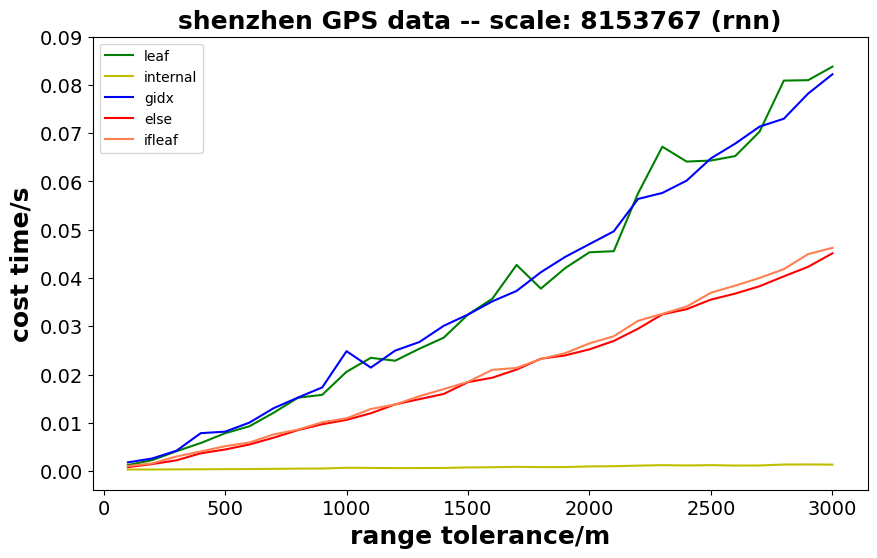

In [33]:
string1 = "1.226000 2.256000 4.097000 5.800000 7.825000 9.271000 12.072000 15.190000 15.792000 20.568000 23.461000 22.853000 25.347000 27.633000 32.424000 35.702000 42.704000 37.803000 42.054000 45.332000 45.556000 57.551000 67.209000 64.127000 64.341000 65.271000 70.315000 80.908000 80.989000 83.798000"
string2 = "0.299000 0.316000 0.342000 0.363000 0.390000 0.408000 0.449000 0.496000 0.521000 0.677000 0.646000 0.601000 0.613000 0.639000 0.746000 0.783000 0.859000 0.814000 0.824000 0.954000 0.997000 1.122000 1.211000 1.154000 1.217000 1.132000 1.145000 1.342000 1.361000 1.325000"
string3 = "1.788000 2.599000 4.206000 7.845000 8.155000 10.025000 13.020000 15.217000 17.331000 24.835000 21.430000 24.949000 26.736000 30.089000 32.431000 35.159000 37.323000 41.196000 44.373000 47.027000 49.669000 56.386000 57.626000 60.181000 64.791000 67.855000 71.367000 73.008000 78.218000 82.217000"
string4 = "0.802000 1.440000 2.219000 3.674000 4.461000 5.495000 6.910000 8.482000 9.699000 10.600000 11.972000 13.806000 14.897000 15.973000 18.415000 19.339000 21.029000 23.269000 23.962000 25.213000 26.956000 29.488000 32.467000 33.541000 35.527000 36.768000 38.296000 40.341000 42.325000 45.114000"
string5 = "1.026000 1.581000 3.012000 4.047000 5.144000 5.904000 7.579000 8.576000 10.101000 10.924000 12.853000 13.768000 15.509000 16.971000 18.474000 20.973000 21.360000 23.216000 24.423000 26.447000 27.931000 31.131000 32.575000 34.075000 36.957000 38.416000 40.012000 41.838000 44.957000 46.248000"
y1, y2, y3, y4, y5 = [], [], [], [], []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item) / 1000.0)
temp = string2.split(' ')
for item in temp:
    if len(item) > 1:
        y2.append(float(item) / 1000.0)
temp = string3.split(' ')
for item in temp:
    if len(item) > 1:
        y3.append(float(item) / 1000.0)
temp = string4.split(' ')
for item in temp:
    if len(item) > 1:
        y4.append(float(item) / 1000.0)
temp = string5.split(' ')
for item in temp:
    if len(item) > 1:
        y5.append(float(item) / 1000.0)
x=np.arange(100,3100, 100)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=14)
l1=plt.plot(x,y1,'g',label='leaf')
l2=plt.plot(x,y2,'y',label='internal')
l3=plt.plot(x,y3,'b',label='gidx')
l4=plt.plot(x,y4,'r',label='else')
l5=plt.plot(x,y5,'coral',label='ifleaf')
# plt.plot(x,y1,'ro-',x,y2,'g+-')
plt.title('shenzhen GPS data -- scale: 8153767 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('range tolerance/m',fontsize = 18, fontweight='heavy')
plt.ylabel('cost time/s',fontsize = 18, fontweight='heavy')
plt.yticks(np.arange(0, 0.1, 0.01))
plt.legend()
plt.show()

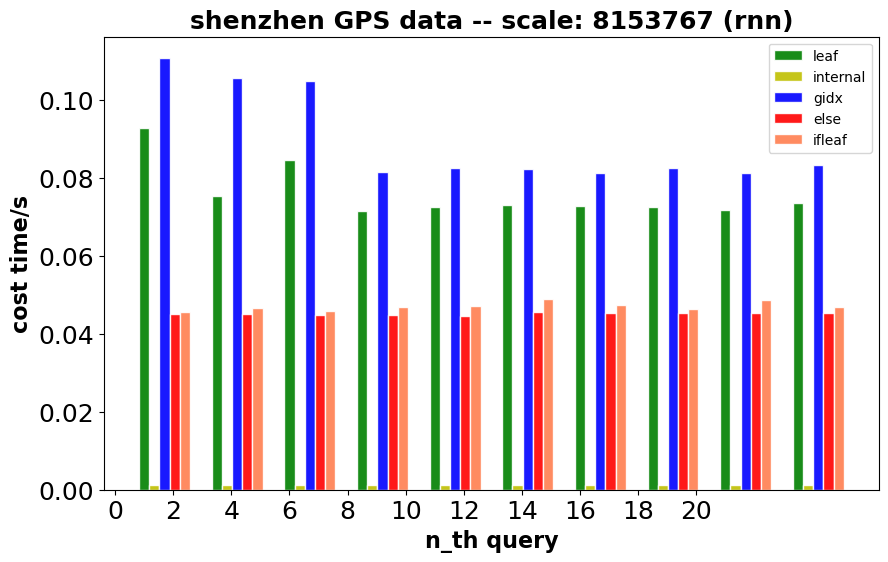

In [75]:
string1 = "92.830000 75.236000 84.508000 71.404000 72.598000 72.884000 72.629000 72.368000 71.710000 73.445000"
string2 = "1.275000 1.088000 1.192000 1.102000 1.330000 1.132000 1.145000 1.151000 1.132000 1.155000"
string3 = "110.609000 105.561000 104.788000 81.419000 82.503000 82.322000 81.104000 82.542000 81.240000 83.190000"
string4 = "44.989000 44.971000 44.787000 44.838000 44.579000 45.461000 45.268000 45.339000 45.360000 45.404000"
string5 = "45.671000 46.481000 45.749000 46.922000 47.096000 48.791000 47.318000 46.422000 48.628000 46.869000"
y1, y2, y3, y4, y5 = [], [], [], [], []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item) / 1000)
temp = string2.split(' ')
for item in temp:
    if len(item) > 1:
        y2.append(float(item) / 1000)
temp = string3.split(' ')
for item in temp:
    if len(item) > 1:
        y3.append(float(item) / 1000)
temp = string4.split(' ')
for item in temp:
    if len(item) > 1:
        y4.append(float(item) / 1000)
temp = string5.split(' ')
for item in temp:
    if len(item) > 1:
        y5.append(float(item) / 1000)
x = np.arange(1, 26, 2.5)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=18)
plt.title('shenzhen GPS data -- scale: 8153767 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('n_th query',fontsize = 16, fontweight='heavy')
plt.ylabel('cost time/s',fontsize = 16, fontweight='heavy')
# plt.yticks(np.arange(0, 7, 0.5))
plt.xticks(np.arange(0, 22, 2))
plt.bar(x, y1, alpha=0.9, width = 0.35, facecolor = 'g', edgecolor = 'white', label='leaf', lw=1)
plt.bar(x+0.35, y2, alpha=0.9, width = 0.35, facecolor = 'y', edgecolor = 'white', label='internal', lw=1)
plt.bar(x+0.7, y3, alpha=0.9, width = 0.35, facecolor = 'b', edgecolor = 'white', label='gidx', lw=1)
plt.bar(x+0.7+0.35, y4, alpha=0.9, width = 0.35, facecolor = 'r', edgecolor = 'white', label='else', lw=1)
plt.bar(x+0.7+0.7, y5, alpha=0.9, width = 0.35, facecolor = 'coral', edgecolor = 'white', label='ifleaf', lw=1)
plt.legend()
plt.show()

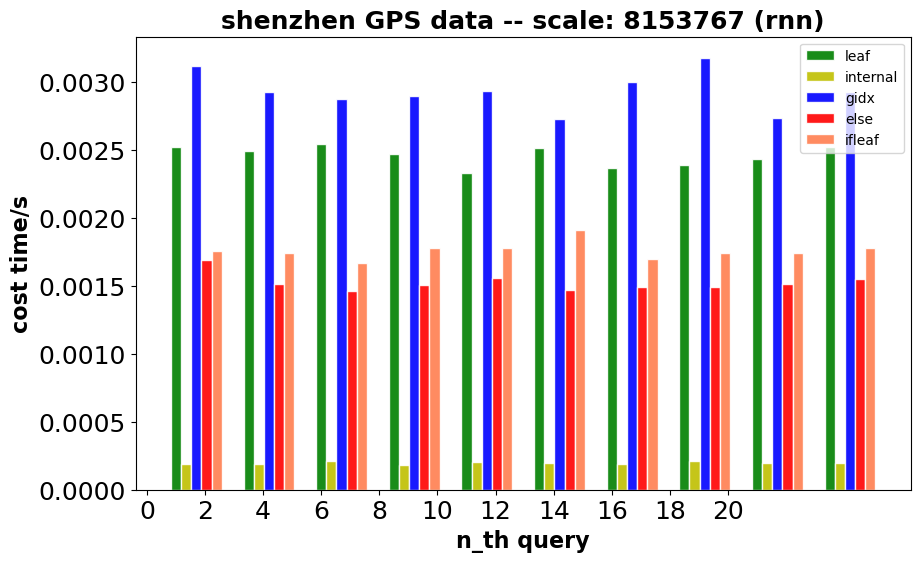

In [76]:
string1 = "2.520000 2.494000 2.542000 2.467000 2.333000 2.510000 2.367000 2.390000 2.429000 2.522000"
string2 = "0.189000 0.189000 0.213000 0.182000 0.203000 0.198000 0.192000 0.208000 0.194000 0.197000"
string3 = "3.113000 2.925000 2.877000 2.899000 2.932000 2.728000 3.002000 3.173000 2.732000 2.922000"
string4 = "1.691000 1.511000 1.459000 1.506000 1.559000 1.468000 1.492000 1.489000 1.513000 1.551000"
string5 = "1.754000 1.738000 1.664000 1.780000 1.781000 1.911000 1.696000 1.744000 1.740000 1.775000"
y1, y2, y3, y4, y5 = [], [], [], [], []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item) / 1000)
temp = string2.split(' ')
for item in temp:
    if len(item) > 1:
        y2.append(float(item) / 1000)
temp = string3.split(' ')
for item in temp:
    if len(item) > 1:
        y3.append(float(item) / 1000)
temp = string4.split(' ')
for item in temp:
    if len(item) > 1:
        y4.append(float(item) / 1000)
temp = string5.split(' ')
for item in temp:
    if len(item) > 1:
        y5.append(float(item) / 1000)
x = np.arange(1, 26, 2.5)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=18)
plt.title('shenzhen GPS data -- scale: 8153767 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('n_th query',fontsize = 16, fontweight='heavy')
plt.ylabel('cost time/s',fontsize = 16, fontweight='heavy')
# plt.yticks(np.arange(0, 7, 0.5))
plt.xticks(np.arange(0, 22, 2))
plt.bar(x, y1, alpha=0.9, width = 0.35, facecolor = 'g', edgecolor = 'white', label='leaf', lw=1)
plt.bar(x+0.35, y2, alpha=0.9, width = 0.35, facecolor = 'y', edgecolor = 'white', label='internal', lw=1)
plt.bar(x+0.7, y3, alpha=0.9, width = 0.35, facecolor = 'b', edgecolor = 'white', label='gidx', lw=1)
plt.bar(x+0.7+0.35, y4, alpha=0.9, width = 0.35, facecolor = 'r', edgecolor = 'white', label='else', lw=1)
plt.bar(x+0.7+0.7, y5, alpha=0.9, width = 0.35, facecolor = 'coral', edgecolor = 'white', label='ifleaf', lw=1)
plt.legend()
plt.show()

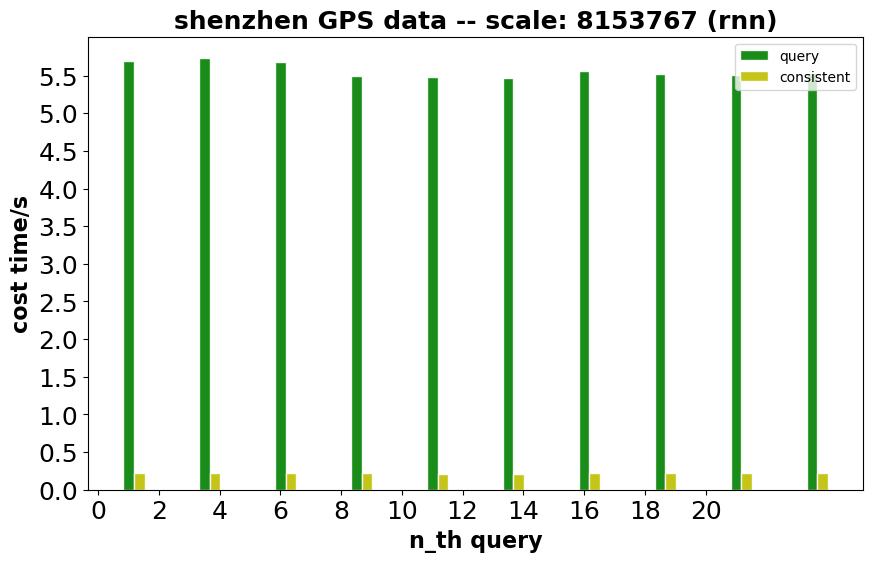

In [77]:
string1 = "5699.315 5730.252 5679.706 5491.055 5479.778 5474.264 5556.274 5520.760 5503.576 5539.722"
string2 = "227.944000 224.363000 224.726000 215.684000 212.902000 208.843000 221.984000 217.682000 226.169000 226.161000"
y1, y2, y3, y4, y5 = [], [], [], [], []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item) / 1000)
temp = string2.split(' ')
for item in temp:
    if len(item) > 1:
        y2.append(float(item) / 1000)
temp = string3.split(' ')
for item in temp:
    if len(item) > 1:
        y3.append(float(item) / 1000)
temp = string4.split(' ')
for item in temp:
    if len(item) > 1:
        y4.append(float(item) / 1000)
temp = string5.split(' ')
for item in temp:
    if len(item) > 1:
        y5.append(float(item) / 1000)
x = np.arange(1, 26, 2.5)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=18)
plt.title('shenzhen GPS data -- scale: 8153767 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('n_th query',fontsize = 16, fontweight='heavy')
plt.ylabel('cost time/s',fontsize = 16, fontweight='heavy')
plt.yticks(np.arange(0, 6, 0.5))
plt.xticks(np.arange(0, 22, 2))
plt.bar(x, y1, alpha=0.9, width = 0.35, facecolor = 'g', edgecolor = 'white', label='query', lw=1)
plt.bar(x+0.35, y2, alpha=0.9, width = 0.35, facecolor = 'y', edgecolor = 'white', label='consistent', lw=1)
plt.legend()
plt.show()

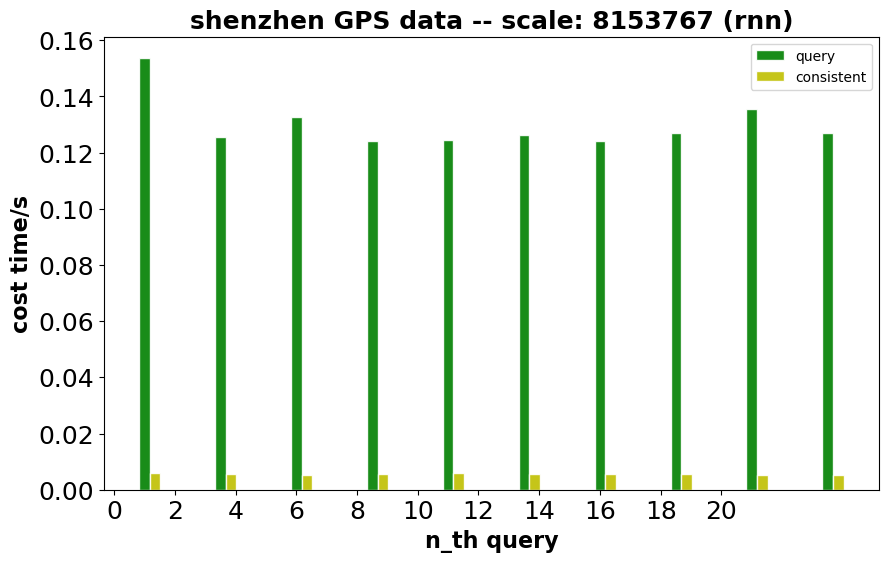

In [78]:
string1 = "153.597 125.696 132.685 124.206 124.441 126.185 124.014 127.164 135.672 126.954"
string2 = "5.887000 5.556000 5.170000 5.500000 5.820000 5.573000 5.477000 5.554000 5.165000 5.418000"
y1, y2, y3, y4, y5 = [], [], [], [], []
temp = string1.split(' ')
for item in temp:
    if len(item) > 1:
        y1.append(float(item) / 1000)
temp = string2.split(' ')
for item in temp:
    if len(item) > 1:
        y2.append(float(item) / 1000)
temp = string3.split(' ')
for item in temp:
    if len(item) > 1:
        y3.append(float(item) / 1000)
temp = string4.split(' ')
for item in temp:
    if len(item) > 1:
        y4.append(float(item) / 1000)
temp = string5.split(' ')
for item in temp:
    if len(item) > 1:
        y5.append(float(item) / 1000)
x = np.arange(1, 26, 2.5)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=18)
plt.title('shenzhen GPS data -- scale: 8153767 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('n_th query',fontsize = 16, fontweight='heavy')
plt.ylabel('cost time/s',fontsize = 16, fontweight='heavy')
# plt.yticks(np.arange(0, 0.5, 0.05))
plt.xticks(np.arange(0, 22, 2))
plt.bar(x, y1, alpha=0.9, width = 0.35, facecolor = 'g', edgecolor = 'white', label='query', lw=1)
plt.bar(x+0.35, y2, alpha=0.9, width = 0.35, facecolor = 'y', edgecolor = 'white', label='consistent', lw=1)
plt.legend()
plt.show()

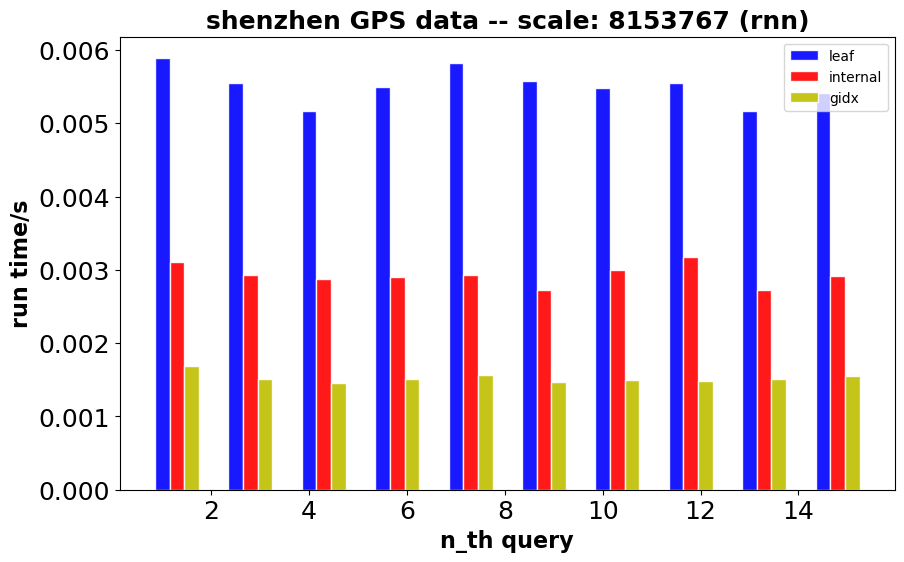

In [79]:
x = np.arange(1, 16, 1.5)
plt.figure(dpi=100, figsize=(10, 6))
plt.tick_params(labelsize=18)
plt.title('shenzhen GPS data -- scale: 8153767 (rnn)',fontsize = 18, fontweight='heavy')
plt.xlabel('n_th query',fontsize = 16, fontweight='heavy')
plt.ylabel('run time/s',fontsize = 16, fontweight='heavy')
plt.bar(x, y2, alpha=0.9, width = 0.3, facecolor = 'b', edgecolor = 'white', label='leaf', lw=1)
plt.bar(x+0.3, y3, alpha=0.9, width = 0.3, facecolor = 'r', edgecolor = 'white', label='internal', lw=1)
plt.bar(x+0.6, y4, alpha=0.9, width = 0.3, facecolor = 'y', edgecolor = 'white', label='gidx', lw=1)
plt.legend()
plt.show()